## Importing Modules

In [ ]:
import re
import nltk
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Setting environment to ignore future warnings
import warnings
warnings.simplefilter('ignore')

# Downloading required data
nltk.download("wordnet")

# Downloading & Loading NLTK modelus
nltk.download('punkt')
nltk.download('wordnet')
nltk.download("stopwords")
nltk.download('maxent_ne_chunker')
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

## Loading Data

**Reading Clean Data**

In [ ]:
import pandas as pd
df_clean = pd.read_csv("/content/drive/MyDrive/AI/Criss/clean_data.csv")
df_clean.head()

,year,artist,genre,lyrics_clean,len
0,2009,beyonce-knowles,7,oh baby know gonna cut right chase woman made ...,966
1,2009,beyonce-knowles,7,playin everything easy like seem sure still wa...,668
2,2009,beyonce-knowles,7,search tenderness hard find love need live loo...,462
3,2009,beyonce-knowles,7,oh oh oh oh oh oh verse 1 wrote book stand tit...,1230
4,2009,beyonce-knowles,7,party people people party popping sitting arou...,887


In [ ]:
input_feature = df_clean.drop(['genre','artist'],axis=1)
output_feature = df_clean.genre

In [ ]:

convert_dict = {'year': str,
                'len': str
                }
 
input_feature = input_feature.astype(convert_dict)
input_feature.dtypes

year            object
lyrics_clean    object
len             object
dtype: object

In [ ]:
input_feature["combined"] = input_feature["year"].str.cat(input_feature[["lyrics_clean", "len"]].astype(str), sep=" ")
input_feature.drop(['year','lyrics_clean','len'],axis=1,inplace=True)

In [ ]:
len(set(output_feature))

10

In [ ]:
input_feature.shape[0]

192683

In [ ]:
import time
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Importing Models
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB

# Importing Evaluation matrices
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

from sklearn.ensemble import RandomForestClassifier



vectorizers = [TfidfVectorizer(max_features=3000, stop_words='english'),
               CountVectorizer(ngram_range=(2,2), max_features=3000, stop_words='english'),
               CountVectorizer(ngram_range=(3,3), max_features=3000, stop_words='english'),
               CountVectorizer(ngram_range=(4,4), max_features=3000, stop_words='english'),
               ]

samplers = [RandomUnderSampler(), SMOTE(), RandomOverSampler()]

models = []
models.append(('ANN', None))
models.append(('SVM(linear Kernel)', SVC(kernel='linear', random_state=0)  ))
models.append(('SVM(Non-linear Kernel)', SVC(kernel='rbf', random_state=0)  ))
models.append(('Random Forest', RandomForestClassifier()))






Epoch 1/10
401/401 [==============================] - 2s 4ms/step - loss: 2.1111 - accuracy: 0.2298 - val_loss: 1.9221 - val_accuracy: 0.3034
Epoch 2/10
401/401 [==============================] - 1s 4ms/step - loss: 1.8654 - accuracy: 0.3262 - val_loss: 1.8741 - val_accuracy: 0.3365
Epoch 3/10
401/401 [==============================] - 1s 4ms/step - loss: 1.7304 - accuracy: 0.3773 - val_loss: 1.8475 - val_accuracy: 0.3371
Epoch 4/10
401/401 [==============================] - 1s 3ms/step - loss: 1.6252 - accuracy: 0.4163 - val_loss: 1.8793 - val_accuracy: 0.3386
Epoch 5/10
401/401 [==============================] - 1s 4ms/step - loss: 1.5359 - accuracy: 0.4444 - val_loss: 1.9218 - val_accuracy: 0.3383
Epoch 6/10
401/401 [==============================] - 1s 4ms/step - loss: 1.4604 - accuracy: 0.4734 - val_loss: 1.9713 - val_accuracy: 0.3358
Epoch 7/10
401/401 [==============================] - 1s 3ms/step - loss: 1.4017 - accuracy: 0.4952 - val_loss: 2.0392 - val_accuracy: 0.3374
Epoch 

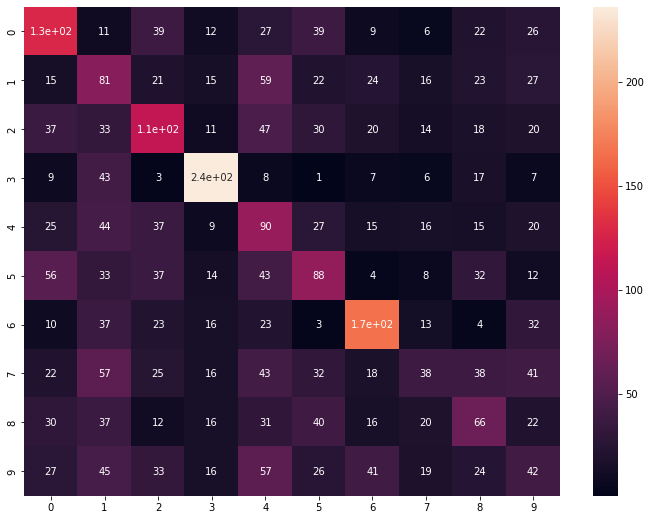

							-----------------------------------------------------------
							 Time for detection (ANN) : 22.691 seconds...
							-----------------------------------------------------------

+ ==================================================================================================== +
			2-For SVM(linear Kernel) The Performance result is: 
+ ==================================================================================================== +
Vectorization Technique :  TfidfVectorizer
--------------------------------------------------
Sampling Technique      :  RandomUnderSampler
--------------------------------------------------
Accuracy :  0.3707865168539326
--------------------------------------------------
F1 :  [0.42901235 0.23529412 0.36740741 0.76898734 0.26766917 0.3474026
 0.59443631 0.24516129 0.27563025 0.15384615]
--------------------------------------------------
Reacll :  [0.43573668 0.25742574 0.36151603 0.72106825 0.29865772 0.32721713
 0.62079511 0.23030303 0.28

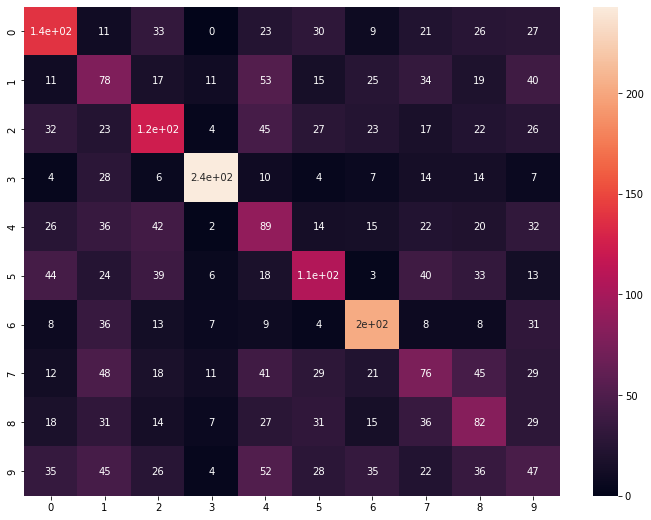

							-----------------------------------------------------------
							 Time for detection (SVM(linear Kernel)) : 118.661 seconds...
							-----------------------------------------------------------

+ ==================================================================================================== +
			3-For SVM(Non-linear Kernel) The Performance result is: 
+ ==================================================================================================== +
Vectorization Technique :  TfidfVectorizer
--------------------------------------------------
Sampling Technique      :  RandomUnderSampler
--------------------------------------------------
Accuracy :  0.38607990012484394
--------------------------------------------------
F1 :  [0.44657097 0.25835866 0.39191291 0.75598086 0.28148148 0.35576923
 0.61344538 0.26298701 0.29845626 0.17472699]
--------------------------------------------------
Reacll :  [0.43887147 0.28052805 0.36734694 0.70326409 0.31879195 0.33944954
 0.66

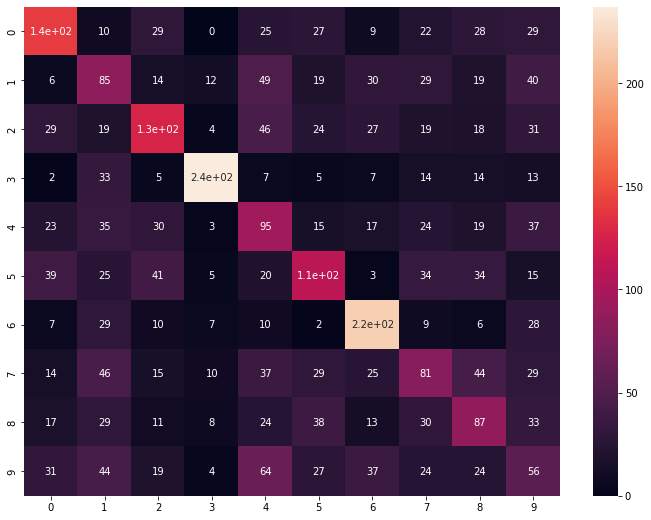

							-----------------------------------------------------------
							 Time for detection (SVM(Non-linear Kernel)) : 160.656 seconds...
							-----------------------------------------------------------

+ ==================================================================================================== +
			4-For Random Forest The Performance result is: 
+ ==================================================================================================== +
Vectorization Technique :  TfidfVectorizer
--------------------------------------------------
Sampling Technique      :  RandomUnderSampler
--------------------------------------------------
Accuracy :  0.3798377028714107
--------------------------------------------------
F1 :  [0.42212518 0.26354319 0.31868132 0.78688525 0.28930818 0.30351438
 0.52918288 0.21052632 0.32868217 0.19472617]
--------------------------------------------------
Reacll :  [0.45454545 0.2970297  0.25364431 0.85459941 0.30872483 0.29051988
 0.62385321

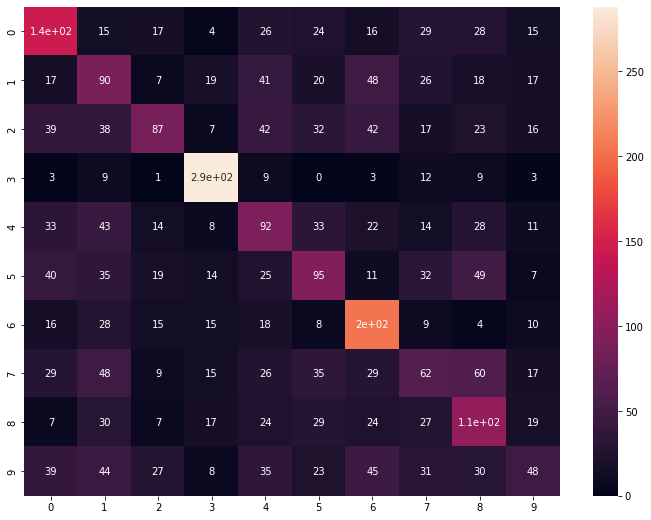

							-----------------------------------------------------------
							 Time for detection (Random Forest) : 32.045 seconds...
							-----------------------------------------------------------

Epoch 1/10
401/401 [==============================] - 2s 4ms/step - loss: 2.0844 - accuracy: 0.2463 - val_loss: 1.8925 - val_accuracy: 0.3237
Epoch 2/10
401/401 [==============================] - 1s 4ms/step - loss: 1.7860 - accuracy: 0.3578 - val_loss: 1.8416 - val_accuracy: 0.3358
Epoch 3/10
401/401 [==============================] - 1s 3ms/step - loss: 1.6599 - accuracy: 0.4049 - val_loss: 1.8644 - val_accuracy: 0.3443
Epoch 4/10
401/401 [==============================] - 2s 4ms/step - loss: 1.5684 - accuracy: 0.4417 - val_loss: 1.8943 - val_accuracy: 0.3458
Epoch 5/10
401/401 [==============================] - 1s 3ms/step - loss: 1.4971 - accuracy: 0.4668 - val_loss: 1.9466 - val_accuracy: 0.3496
Epoch 6/10
401/401 [==============================] - 1s 3ms/step - loss: 1.4247 - accuracy:

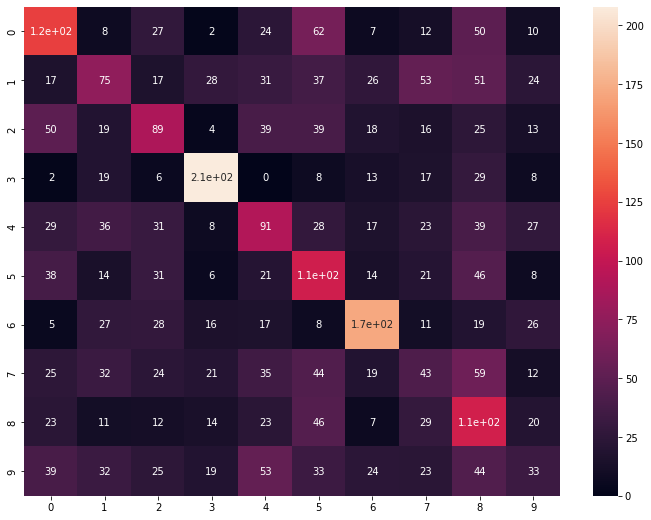

							-----------------------------------------------------------
							 Time for detection (ANN) : 16.899 seconds...
							-----------------------------------------------------------

+ ==================================================================================================== +
			2-For SVM(linear Kernel) The Performance result is: 
+ ==================================================================================================== +
Vectorization Technique :  TfidfVectorizer
--------------------------------------------------
Sampling Technique      :  SMOTE
--------------------------------------------------
Accuracy :  0.3879525593008739
--------------------------------------------------
F1 :  [0.4279476  0.29837518 0.37538462 0.72903226 0.30434783 0.35987261
 0.60667634 0.21406728 0.33449477 0.20854701]
--------------------------------------------------
Reacll :  [0.44954128 0.28133705 0.39102564 0.72903226 0.29787234 0.36928105
 0.63525836 0.22292994 0.32764505 0.187

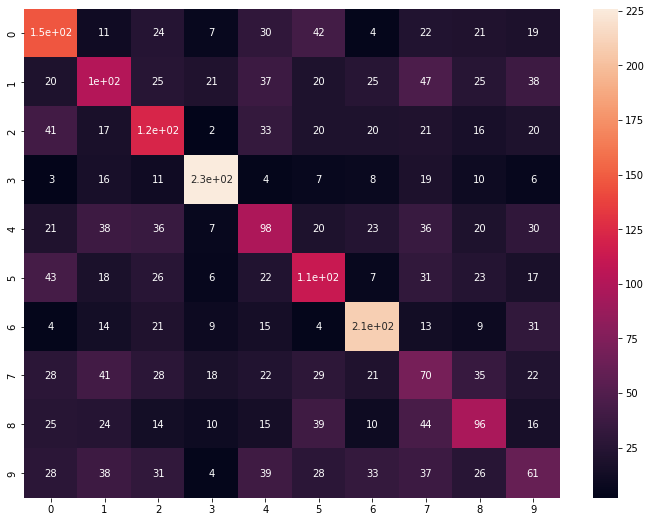

							-----------------------------------------------------------
							 Time for detection (SVM(linear Kernel)) : 119.768 seconds...
							-----------------------------------------------------------

+ ==================================================================================================== +
			3-For SVM(Non-linear Kernel) The Performance result is: 
+ ==================================================================================================== +
Vectorization Technique :  TfidfVectorizer
--------------------------------------------------
Sampling Technique      :  SMOTE
--------------------------------------------------
Accuracy :  0.39856429463171034
--------------------------------------------------
F1 :  [0.44903988 0.30559758 0.40185471 0.72666667 0.32238806 0.37417219
 0.62215909 0.2345679  0.32124352 0.21682848]
--------------------------------------------------
Reacll :  [0.4648318  0.28133705 0.41666667 0.70322581 0.32826748 0.36928105
 0.6656535  0.2420

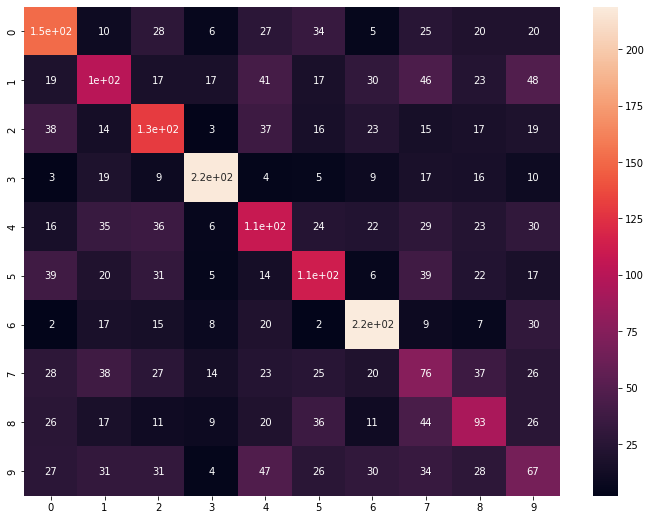

							-----------------------------------------------------------
							 Time for detection (SVM(Non-linear Kernel)) : 163.457 seconds...
							-----------------------------------------------------------

+ ==================================================================================================== +
			4-For Random Forest The Performance result is: 
+ ==================================================================================================== +
Vectorization Technique :  TfidfVectorizer
--------------------------------------------------
Sampling Technique      :  SMOTE
--------------------------------------------------
Accuracy :  0.38607990012484394
--------------------------------------------------
F1 :  [0.42632332 0.27083333 0.37789661 0.72340426 0.27457098 0.27242525
 0.57598039 0.26446281 0.34193548 0.18480493]
--------------------------------------------------
Reacll :  [0.45565749 0.25348189 0.33974359 0.82258065 0.2674772  0.26797386
 0.71428571 0.25477707 

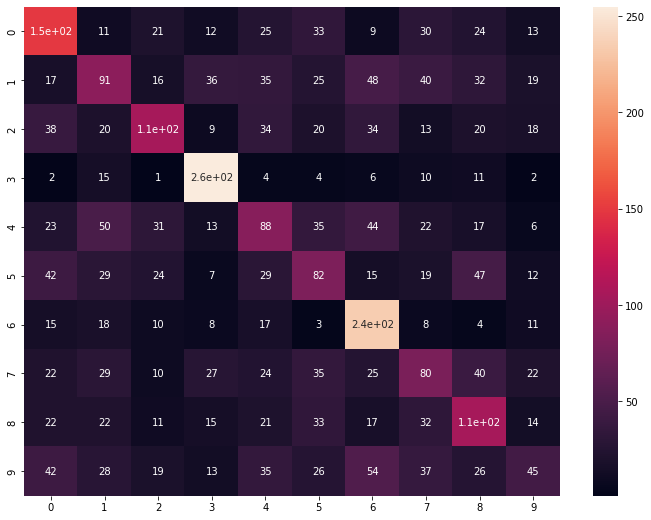

							-----------------------------------------------------------
							 Time for detection (Random Forest) : 32.612 seconds...
							-----------------------------------------------------------

Epoch 1/10
401/401 [==============================] - 2s 4ms/step - loss: 2.1374 - accuracy: 0.2182 - val_loss: 1.9497 - val_accuracy: 0.2981
Epoch 2/10
401/401 [==============================] - 1s 3ms/step - loss: 1.8540 - accuracy: 0.3480 - val_loss: 1.8802 - val_accuracy: 0.3352
Epoch 3/10
401/401 [==============================] - 2s 4ms/step - loss: 1.7087 - accuracy: 0.3999 - val_loss: 1.8696 - val_accuracy: 0.3449
Epoch 4/10
401/401 [==============================] - 2s 4ms/step - loss: 1.5902 - accuracy: 0.4448 - val_loss: 1.8725 - val_accuracy: 0.3471
Epoch 5/10
401/401 [==============================] - 1s 3ms/step - loss: 1.4976 - accuracy: 0.4728 - val_loss: 1.8988 - val_accuracy: 0.3508
Epoch 6/10
401/401 [==============================] - 1s 3ms/step - loss: 1.4231 - accuracy:

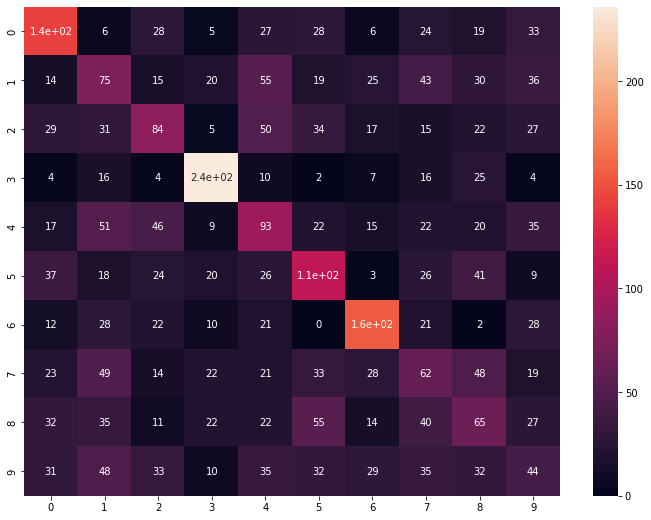

							-----------------------------------------------------------
							 Time for detection (ANN) : 16.651 seconds...
							-----------------------------------------------------------

+ ==================================================================================================== +
			2-For SVM(linear Kernel) The Performance result is: 
+ ==================================================================================================== +
Vectorization Technique :  TfidfVectorizer
--------------------------------------------------
Sampling Technique      :  RandomOverSampler
--------------------------------------------------
Accuracy :  0.3748439450686642
--------------------------------------------------
F1 :  [0.44677661 0.26551227 0.32063492 0.76451613 0.3219076  0.32389937
 0.5988024  0.24803768 0.2614601  0.18425461]
--------------------------------------------------
Reacll :  [0.46855346 0.27710843 0.32165605 0.73148148 0.32727273 0.32594937
 0.66889632 0.2476489  0.23

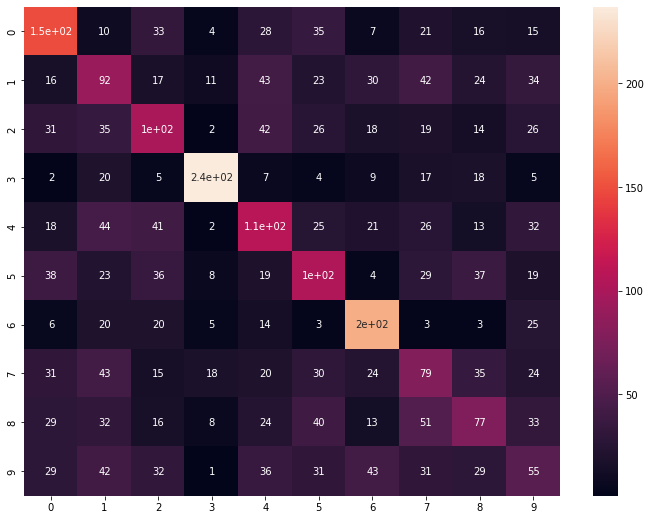

							-----------------------------------------------------------
							 Time for detection (SVM(linear Kernel)) : 119.082 seconds...
							-----------------------------------------------------------

+ ==================================================================================================== +
			3-For SVM(Non-linear Kernel) The Performance result is: 
+ ==================================================================================================== +
Vectorization Technique :  TfidfVectorizer
--------------------------------------------------
Sampling Technique      :  RandomOverSampler
--------------------------------------------------
Accuracy :  0.3882646691635456
--------------------------------------------------
F1 :  [0.48181818 0.29096478 0.34460548 0.75986842 0.34       0.33279483
 0.6084425  0.25       0.26578073 0.19808307]
--------------------------------------------------
Reacll :  [0.5        0.28614458 0.34076433 0.71296296 0.36060606 0.32594937
 0.6989

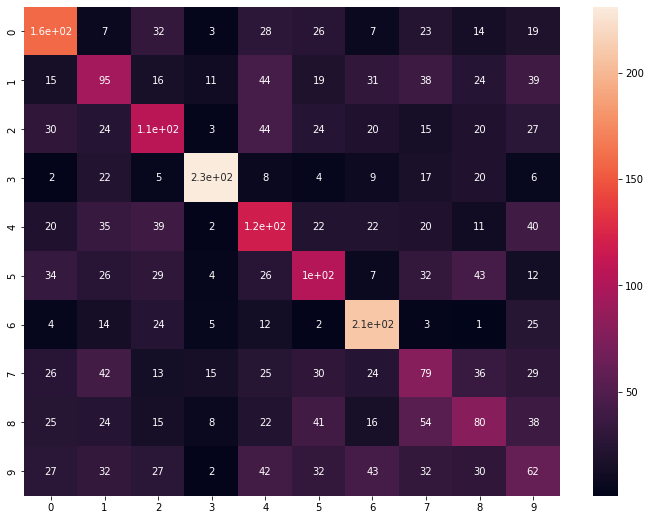

							-----------------------------------------------------------
							 Time for detection (SVM(Non-linear Kernel)) : 163.606 seconds...
							-----------------------------------------------------------

+ ==================================================================================================== +
			4-For Random Forest The Performance result is: 
+ ==================================================================================================== +
Vectorization Technique :  TfidfVectorizer
--------------------------------------------------
Sampling Technique      :  RandomOverSampler
--------------------------------------------------
Accuracy :  0.3848314606741573
--------------------------------------------------
F1 :  [0.42382271 0.27900552 0.32029795 0.76420455 0.31321839 0.30689655
 0.56568365 0.23076923 0.3404908  0.16      ]
--------------------------------------------------
Reacll :  [0.48113208 0.30421687 0.27388535 0.83024691 0.33030303 0.28164557
 0.70568562 

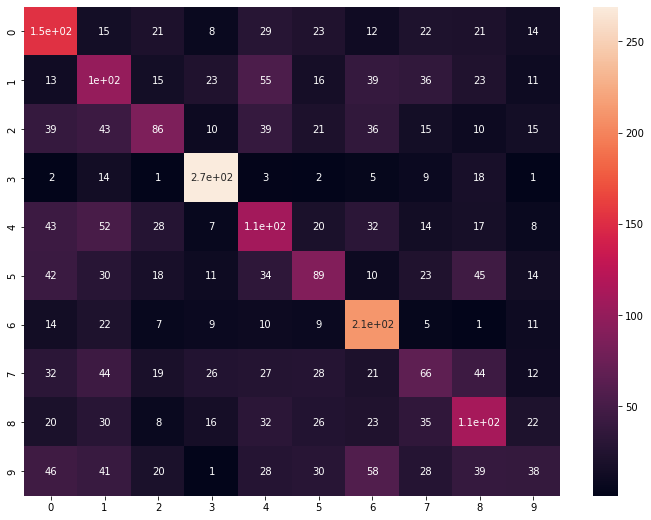

							-----------------------------------------------------------
							 Time for detection (Random Forest) : 34.222 seconds...
							-----------------------------------------------------------

Epoch 1/10
401/401 [==============================] - 3s 5ms/step - loss: 2.2590 - accuracy: 0.1552 - val_loss: 2.1873 - val_accuracy: 0.2066
Epoch 2/10
401/401 [==============================] - 2s 4ms/step - loss: 2.0913 - accuracy: 0.2481 - val_loss: 2.2006 - val_accuracy: 0.2194
Epoch 3/10
401/401 [==============================] - 2s 4ms/step - loss: 1.9431 - accuracy: 0.3056 - val_loss: 2.2806 - val_accuracy: 0.2210
Epoch 4/10
401/401 [==============================] - 2s 4ms/step - loss: 1.8008 - accuracy: 0.3639 - val_loss: 2.4220 - val_accuracy: 0.2116
Epoch 5/10
401/401 [==============================] - 2s 4ms/step - loss: 1.6840 - accuracy: 0.4054 - val_loss: 2.5924 - val_accuracy: 0.2191
Epoch 6/10
401/401 [==============================] - 2s 4ms/step - loss: 1.5871 - accuracy:

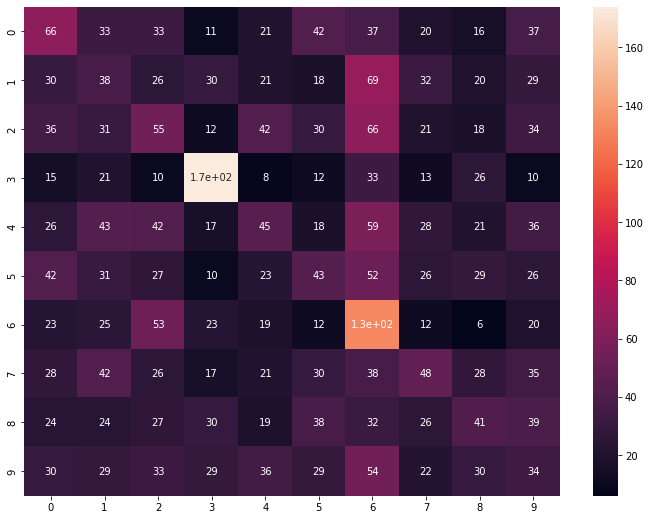

							-----------------------------------------------------------
							 Time for detection (ANN) : 23.309 seconds...
							-----------------------------------------------------------

+ ==================================================================================================== +
			2-For SVM(linear Kernel) The Performance result is: 
+ ==================================================================================================== +
Vectorization Technique :  CountVectorizer
--------------------------------------------------
Sampling Technique      :  RandomUnderSampler
--------------------------------------------------
Accuracy :  0.22815230961298377
--------------------------------------------------
F1 :  [0.24519941 0.14545455 0.21828909 0.51428571 0.15857605 0.15463918
 0.33613445 0.13333333 0.19298246 0.07984791]
--------------------------------------------------
Reacll :  [0.26265823 0.14057508 0.21449275 0.50310559 0.14626866 0.14563107
 0.49230769 0.12140575 0.

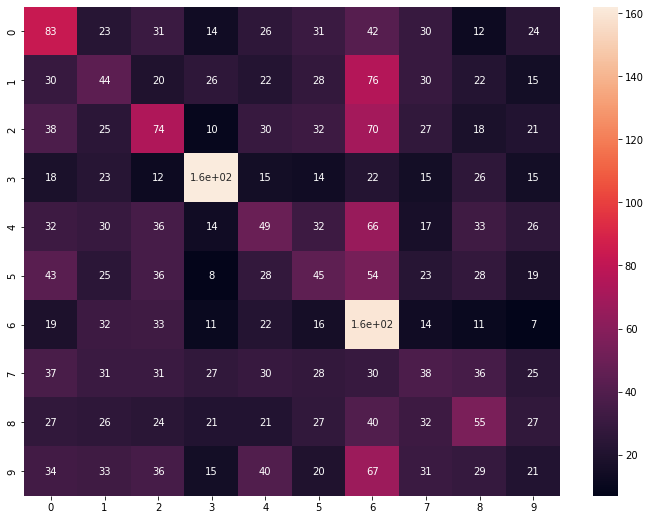

							-----------------------------------------------------------
							 Time for detection (SVM(linear Kernel)) : 48.076 seconds...
							-----------------------------------------------------------

+ ==================================================================================================== +
			3-For SVM(Non-linear Kernel) The Performance result is: 
+ ==================================================================================================== +
Vectorization Technique :  CountVectorizer
--------------------------------------------------
Sampling Technique      :  RandomUnderSampler
--------------------------------------------------
Accuracy :  0.20568039950062422
--------------------------------------------------
F1 :  [0.17699115 0.06366048 0.12154696 0.50570342 0.09480813 0.09367681
 0.27324088 0.20029455 0.17842324 0.06205251]
--------------------------------------------------
Reacll :  [0.15822785 0.03833866 0.09565217 0.41304348 0.06268657 0.06472492
 0.818

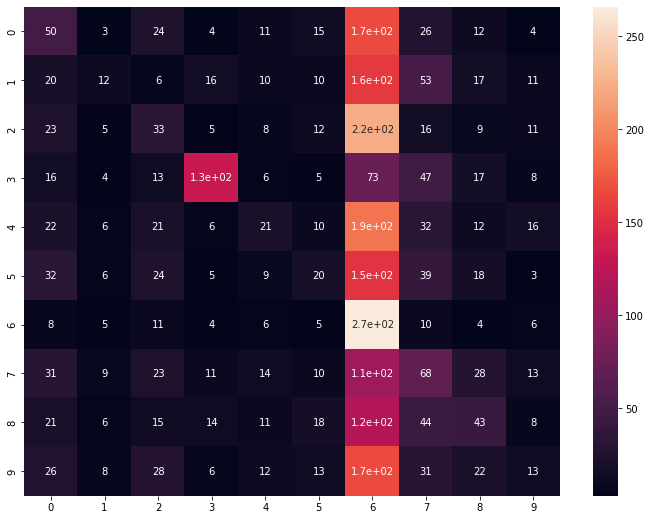

							-----------------------------------------------------------
							 Time for detection (SVM(Non-linear Kernel)) : 36.008 seconds...
							-----------------------------------------------------------

+ ==================================================================================================== +
			4-For Random Forest The Performance result is: 
+ ==================================================================================================== +
Vectorization Technique :  CountVectorizer
--------------------------------------------------
Sampling Technique      :  RandomUnderSampler
--------------------------------------------------
Accuracy :  0.22846441947565543
--------------------------------------------------
F1 :  [0.21533442 0.18569254 0.18639053 0.5958132  0.12094395 0.16909621
 0.33527357 0.1038961  0.22641509 0.06923077]
--------------------------------------------------
Reacll :  [0.20886076 0.19488818 0.1826087  0.57453416 0.12238806 0.18770227
 0.44307692

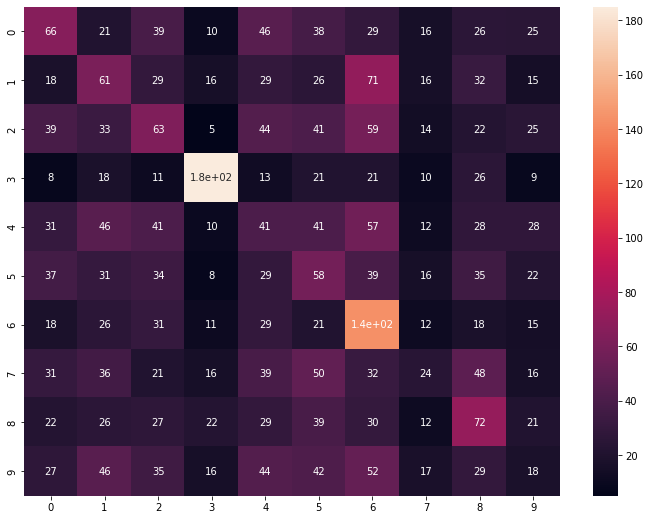

							-----------------------------------------------------------
							 Time for detection (Random Forest) : 24.715 seconds...
							-----------------------------------------------------------

Epoch 1/10
401/401 [==============================] - 2s 5ms/step - loss: 2.2463 - accuracy: 0.1603 - val_loss: 2.1774 - val_accuracy: 0.2150
Epoch 2/10
401/401 [==============================] - 2s 4ms/step - loss: 2.0892 - accuracy: 0.2490 - val_loss: 2.1726 - val_accuracy: 0.2194
Epoch 3/10
401/401 [==============================] - 2s 4ms/step - loss: 1.9477 - accuracy: 0.3057 - val_loss: 2.2270 - val_accuracy: 0.2241
Epoch 4/10
401/401 [==============================] - 2s 4ms/step - loss: 1.8262 - accuracy: 0.3466 - val_loss: 2.3444 - val_accuracy: 0.2260
Epoch 5/10
401/401 [==============================] - 2s 4ms/step - loss: 1.7170 - accuracy: 0.3889 - val_loss: 2.4999 - val_accuracy: 0.2331
Epoch 6/10
401/401 [==============================] - 2s 4ms/step - loss: 1.6330 - accuracy:

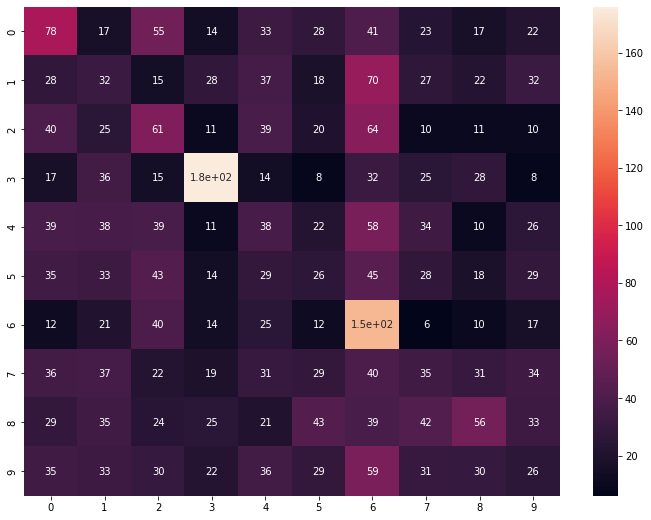

							-----------------------------------------------------------
							 Time for detection (ANN) : 19.398 seconds...
							-----------------------------------------------------------

+ ==================================================================================================== +
			2-For SVM(linear Kernel) The Performance result is: 
+ ==================================================================================================== +
Vectorization Technique :  CountVectorizer
--------------------------------------------------
Sampling Technique      :  SMOTE
--------------------------------------------------
Accuracy :  0.23314606741573032
--------------------------------------------------
F1 :  [0.21396731 0.14563107 0.17693523 0.49327354 0.16161616 0.16608997
 0.35355649 0.16117216 0.23662885 0.10305344]
--------------------------------------------------
Reacll :  [0.2195122  0.14563107 0.19243986 0.45961003 0.15238095 0.16
 0.54516129 0.14012739 0.21037464 0.081571  

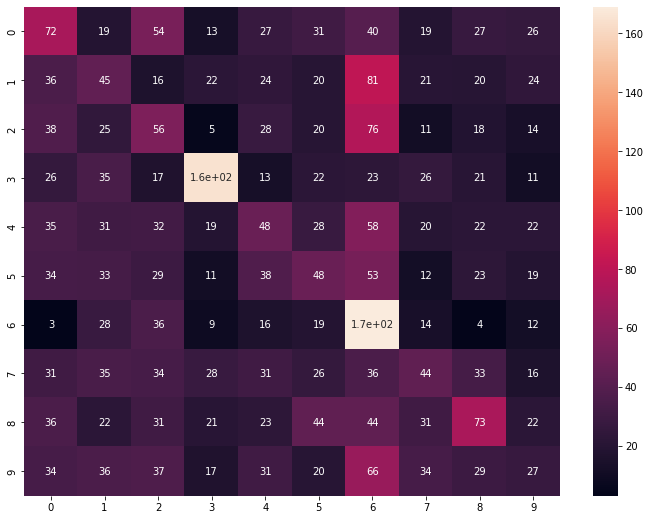

							-----------------------------------------------------------
							 Time for detection (SVM(linear Kernel)) : 47.797 seconds...
							-----------------------------------------------------------

+ ==================================================================================================== +
			3-For SVM(Non-linear Kernel) The Performance result is: 
+ ==================================================================================================== +
Vectorization Technique :  CountVectorizer
--------------------------------------------------
Sampling Technique      :  SMOTE
--------------------------------------------------
Accuracy :  0.216916354556804
--------------------------------------------------
F1 :  [0.18386492 0.05945946 0.12734082 0.511883   0.10328638 0.0971867
 0.28012358 0.20413793 0.23333333 0.055     ]
--------------------------------------------------
Reacll :  [0.14939024 0.03559871 0.11683849 0.38997214 0.06984127 0.06333333
 0.87741935 0.23566879

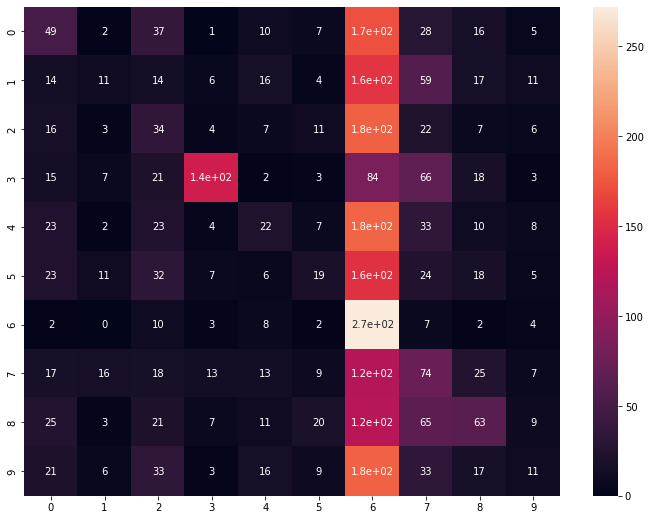

							-----------------------------------------------------------
							 Time for detection (SVM(Non-linear Kernel)) : 35.861 seconds...
							-----------------------------------------------------------

+ ==================================================================================================== +
			4-For Random Forest The Performance result is: 
+ ==================================================================================================== +
Vectorization Technique :  CountVectorizer
--------------------------------------------------
Sampling Technique      :  SMOTE
--------------------------------------------------
Accuracy :  0.23220973782771537
--------------------------------------------------
F1 :  [0.18954248 0.159375   0.16013629 0.55639098 0.13717421 0.17791411
 0.32858708 0.11034483 0.28       0.11428571]
--------------------------------------------------
Reacll :  [0.17682927 0.16504854 0.16151203 0.51532033 0.15873016 0.19333333
 0.48387097 0.07643312 0

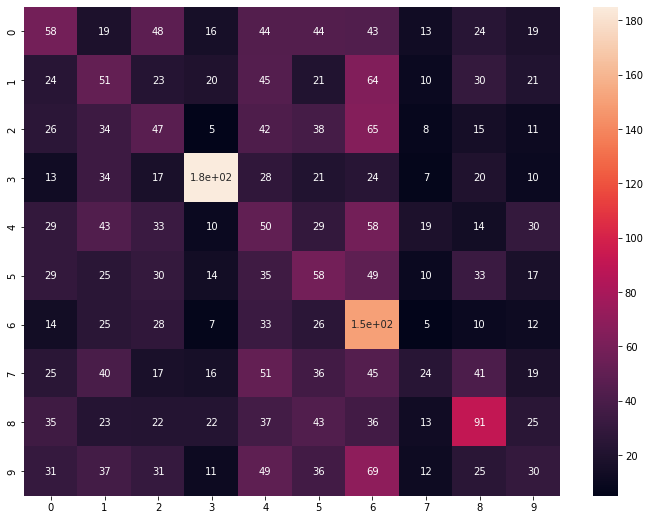

							-----------------------------------------------------------
							 Time for detection (Random Forest) : 26.433 seconds...
							-----------------------------------------------------------

Epoch 1/10
401/401 [==============================] - 3s 7ms/step - loss: 2.2493 - accuracy: 0.1672 - val_loss: 2.1800 - val_accuracy: 0.1882
Epoch 2/10
401/401 [==============================] - 2s 4ms/step - loss: 2.0952 - accuracy: 0.2427 - val_loss: 2.1646 - val_accuracy: 0.2076
Epoch 3/10
401/401 [==============================] - 2s 4ms/step - loss: 1.9493 - accuracy: 0.3012 - val_loss: 2.2453 - val_accuracy: 0.2044
Epoch 4/10
401/401 [==============================] - 2s 4ms/step - loss: 1.8201 - accuracy: 0.3549 - val_loss: 2.3748 - val_accuracy: 0.2063
Epoch 5/10
401/401 [==============================] - 1s 4ms/step - loss: 1.7064 - accuracy: 0.3969 - val_loss: 2.5454 - val_accuracy: 0.2144
Epoch 6/10
401/401 [==============================] - 2s 4ms/step - loss: 1.6201 - accuracy:

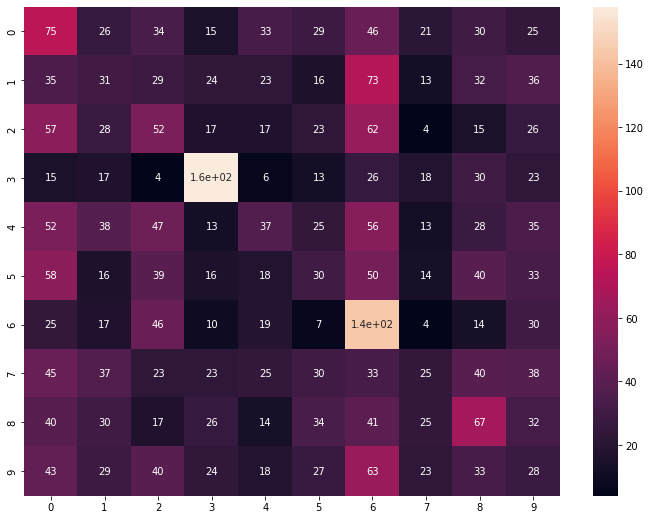

							-----------------------------------------------------------
							 Time for detection (ANN) : 19.485 seconds...
							-----------------------------------------------------------

+ ==================================================================================================== +
			2-For SVM(linear Kernel) The Performance result is: 
+ ==================================================================================================== +
Vectorization Technique :  CountVectorizer
--------------------------------------------------
Sampling Technique      :  RandomOverSampler
--------------------------------------------------
Accuracy :  0.22034956304619227
--------------------------------------------------
F1 :  [0.20992908 0.1239531  0.2056338  0.48177496 0.09722222 0.17647059
 0.33506764 0.16605166 0.19343066 0.11428571]
--------------------------------------------------
Reacll :  [0.22155689 0.11858974 0.24252492 0.49032258 0.08139535 0.16242038
 0.50949367 0.14106583 0.1

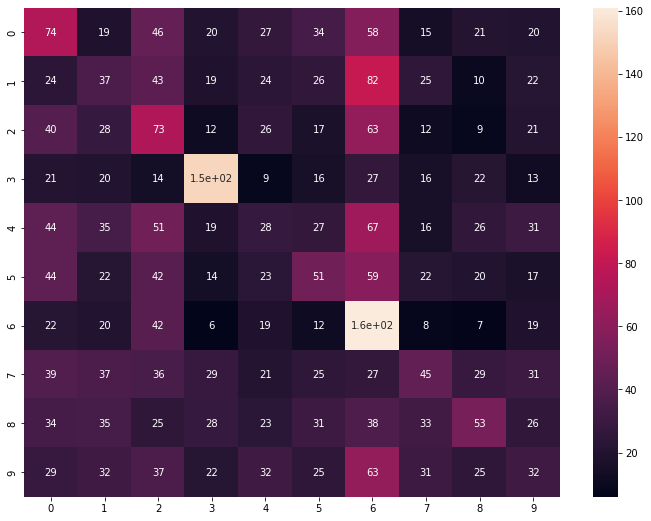

							-----------------------------------------------------------
							 Time for detection (SVM(linear Kernel)) : 48.309 seconds...
							-----------------------------------------------------------

+ ==================================================================================================== +
			3-For SVM(Non-linear Kernel) The Performance result is: 
+ ==================================================================================================== +
Vectorization Technique :  CountVectorizer
--------------------------------------------------
Sampling Technique      :  RandomOverSampler
--------------------------------------------------
Accuracy :  0.19662921348314608
--------------------------------------------------
F1 :  [0.13508443 0.04221636 0.13754647 0.47035573 0.09734513 0.05301205
 0.26347305 0.21597633 0.18218623 0.0729927 ]
--------------------------------------------------
Reacll :  [0.10778443 0.02564103 0.12292359 0.38387097 0.06395349 0.03503185
 0.8354

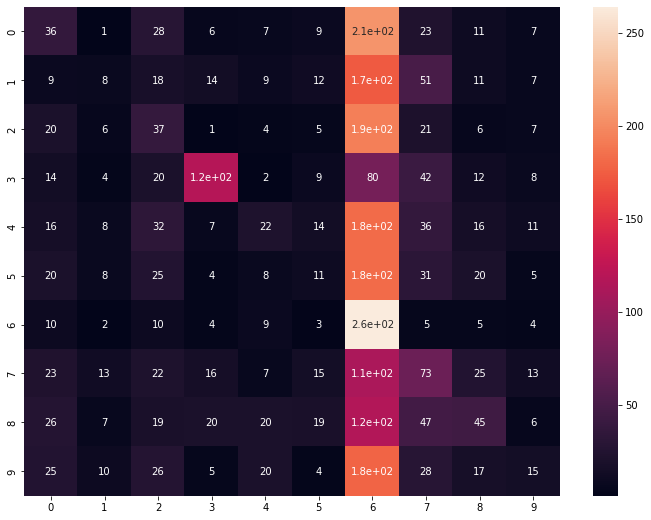

							-----------------------------------------------------------
							 Time for detection (SVM(Non-linear Kernel)) : 36.412 seconds...
							-----------------------------------------------------------

+ ==================================================================================================== +
			4-For Random Forest The Performance result is: 
+ ==================================================================================================== +
Vectorization Technique :  CountVectorizer
--------------------------------------------------
Sampling Technique      :  RandomOverSampler
--------------------------------------------------
Accuracy :  0.23096129837702872
--------------------------------------------------
F1 :  [0.21052632 0.16207455 0.22522523 0.55445545 0.15453195 0.18104668
 0.33081081 0.09292035 0.2173913  0.10071942]
--------------------------------------------------
Reacll :  [0.19161677 0.16025641 0.24916944 0.54193548 0.15116279 0.20382166
 0.48417722 

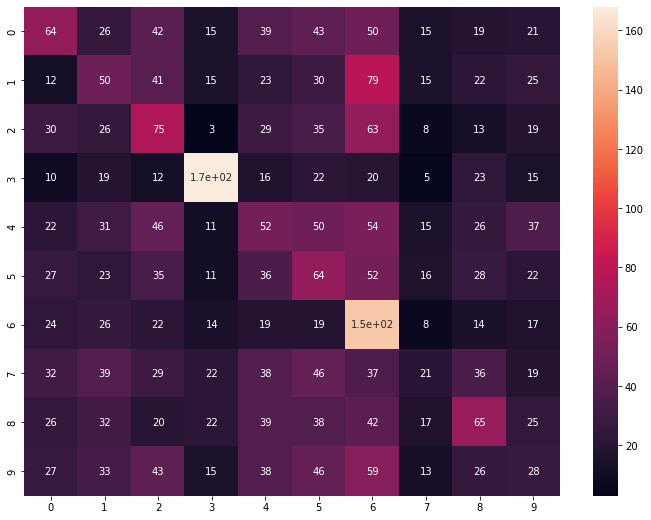

							-----------------------------------------------------------
							 Time for detection (Random Forest) : 24.815 seconds...
							-----------------------------------------------------------

Epoch 1/10
401/401 [==============================] - 3s 5ms/step - loss: 2.2959 - accuracy: 0.1228 - val_loss: 2.2933 - val_accuracy: 0.1336
Epoch 2/10
401/401 [==============================] - 2s 4ms/step - loss: 2.2577 - accuracy: 0.1664 - val_loss: 2.3014 - val_accuracy: 0.1486
Epoch 3/10
401/401 [==============================] - 2s 4ms/step - loss: 2.1923 - accuracy: 0.2032 - val_loss: 2.3568 - val_accuracy: 0.1476
Epoch 4/10
401/401 [==============================] - 2s 6ms/step - loss: 2.1237 - accuracy: 0.2305 - val_loss: 2.4417 - val_accuracy: 0.1448
Epoch 5/10
401/401 [==============================] - 2s 6ms/step - loss: 2.0529 - accuracy: 0.2572 - val_loss: 2.5939 - val_accuracy: 0.1467
Epoch 6/10
401/401 [==============================] - 3s 9ms/step - loss: 1.9969 - accuracy:

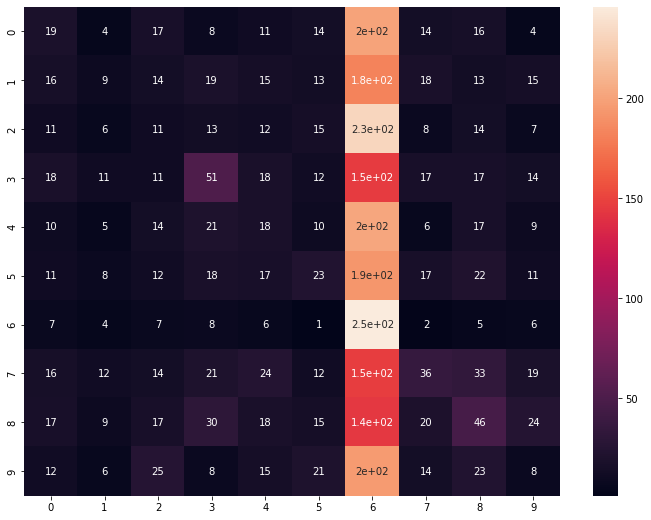

							-----------------------------------------------------------
							 Time for detection (ANN) : 22.592 seconds...
							-----------------------------------------------------------

+ ==================================================================================================== +
			2-For SVM(linear Kernel) The Performance result is: 
+ ==================================================================================================== +
Vectorization Technique :  CountVectorizer
--------------------------------------------------
Sampling Technique      :  RandomUnderSampler
--------------------------------------------------
Accuracy :  0.14294631710362046
--------------------------------------------------
F1 :  [0.08370044 0.07529412 0.06759443 0.2        0.06930693 0.07692308
 0.21267723 0.13596491 0.14864865 0.05092593]
--------------------------------------------------
Reacll :  [0.06168831 0.05095541 0.05167173 0.14285714 0.04487179 0.05120482
 0.87328767 0.09281437 0.

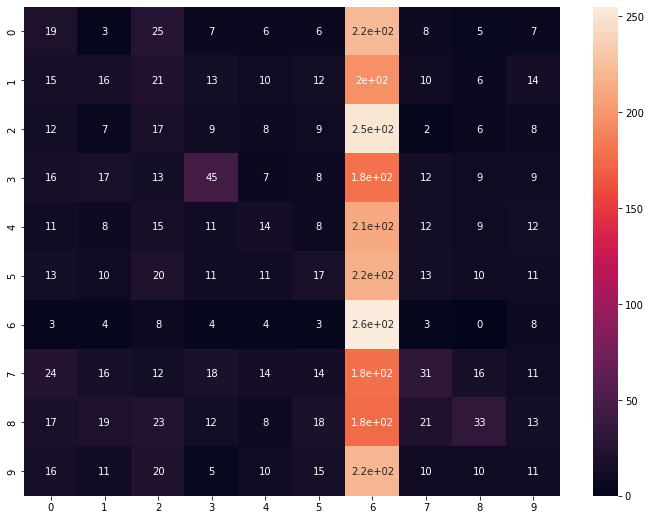

							-----------------------------------------------------------
							 Time for detection (SVM(linear Kernel)) : 16.043 seconds...
							-----------------------------------------------------------

+ ==================================================================================================== +
			3-For SVM(Non-linear Kernel) The Performance result is: 
+ ==================================================================================================== +
Vectorization Technique :  CountVectorizer
--------------------------------------------------
Sampling Technique      :  RandomUnderSampler
--------------------------------------------------
Accuracy :  0.12421972534332085
--------------------------------------------------
F1 :  [0.05944798 0.0286533  0.02083333 0.0972973  0.01694915 0.01719198
 0.19522472 0.17904762 0.12410501 0.        ]
--------------------------------------------------
Reacll :  [0.04545455 0.01592357 0.01215805 0.05714286 0.00961538 0.00903614
 0.952

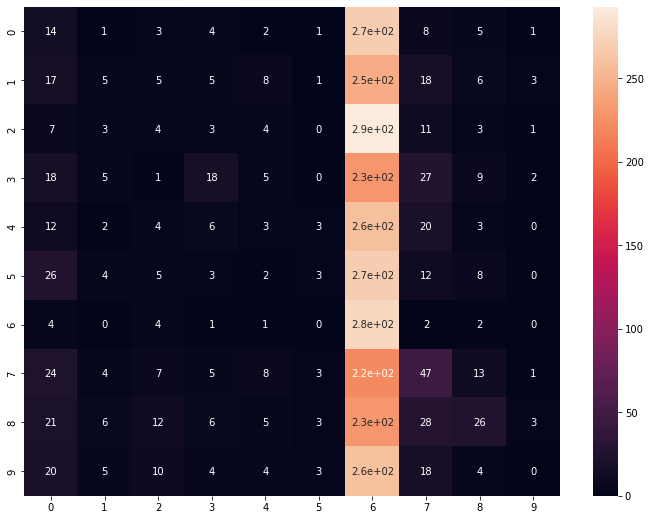

							-----------------------------------------------------------
							 Time for detection (SVM(Non-linear Kernel)) : 16.608 seconds...
							-----------------------------------------------------------

+ ==================================================================================================== +
			4-For Random Forest The Performance result is: 
+ ==================================================================================================== +
Vectorization Technique :  CountVectorizer
--------------------------------------------------
Sampling Technique      :  RandomUnderSampler
--------------------------------------------------
Accuracy :  0.1544943820224719
--------------------------------------------------
F1 :  [0.12328767 0.06635071 0.06018519 0.21774194 0.10503282 0.11666667
 0.22634676 0.1097561  0.16287879 0.0660793 ]
--------------------------------------------------
Reacll :  [0.08766234 0.04458599 0.03951368 0.17142857 0.07692308 0.08433735
 0.85616438 

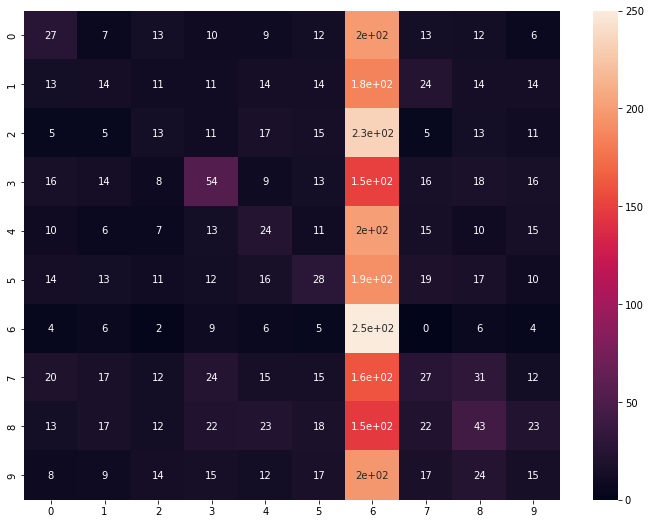

							-----------------------------------------------------------
							 Time for detection (Random Forest) : 22.102 seconds...
							-----------------------------------------------------------

Epoch 1/10
401/401 [==============================] - 3s 5ms/step - loss: 2.2991 - accuracy: 0.1181 - val_loss: 2.2882 - val_accuracy: 0.1355
Epoch 2/10
401/401 [==============================] - 2s 4ms/step - loss: 2.2602 - accuracy: 0.1619 - val_loss: 2.2873 - val_accuracy: 0.1514
Epoch 3/10
401/401 [==============================] - 2s 5ms/step - loss: 2.1995 - accuracy: 0.1898 - val_loss: 2.3293 - val_accuracy: 0.1467
Epoch 4/10
401/401 [==============================] - 2s 5ms/step - loss: 2.1297 - accuracy: 0.2184 - val_loss: 2.4243 - val_accuracy: 0.1576
Epoch 5/10
401/401 [==============================] - 2s 5ms/step - loss: 2.0561 - accuracy: 0.2440 - val_loss: 2.5822 - val_accuracy: 0.1451
Epoch 6/10
401/401 [==============================] - 2s 4ms/step - loss: 1.9983 - accuracy:

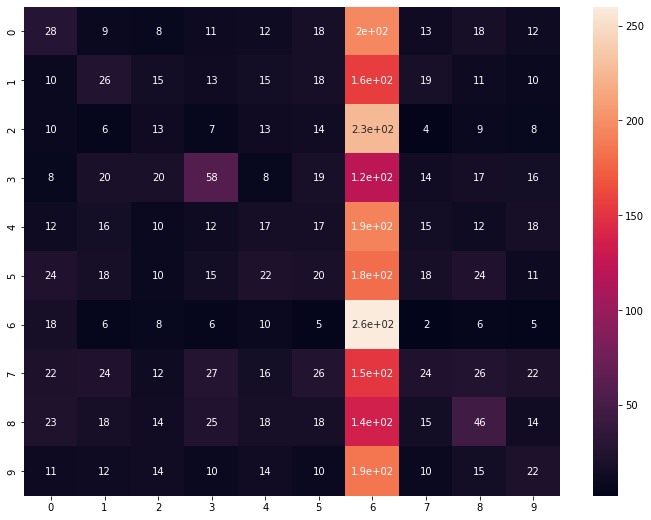

							-----------------------------------------------------------
							 Time for detection (ANN) : 24.749 seconds...
							-----------------------------------------------------------

+ ==================================================================================================== +
			2-For SVM(linear Kernel) The Performance result is: 
+ ==================================================================================================== +
Vectorization Technique :  CountVectorizer
--------------------------------------------------
Sampling Technique      :  SMOTE
--------------------------------------------------
Accuracy :  0.15106117353308365
--------------------------------------------------
F1 :  [0.1021611  0.08163265 0.05020921 0.18181818 0.07589286 0.06711409
 0.23943072 0.13882863 0.16122004 0.02020202]
--------------------------------------------------
Reacll :  [0.08       0.05460751 0.03870968 0.12913907 0.05279503 0.04373178
 0.87730061 0.09116809 0.11280488 0.01

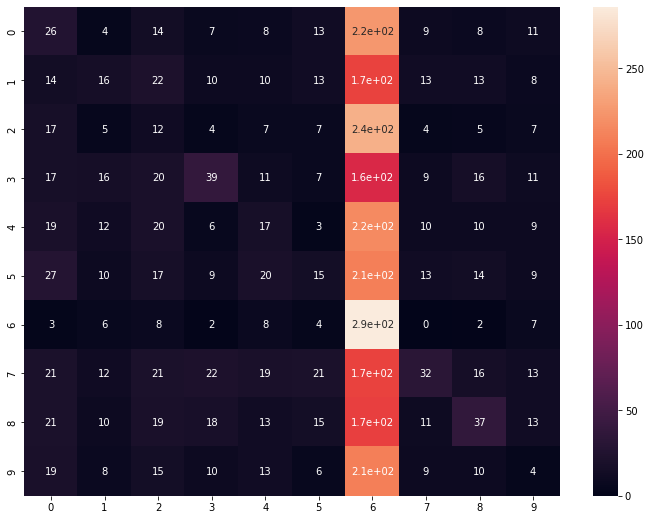

							-----------------------------------------------------------
							 Time for detection (SVM(linear Kernel)) : 14.225 seconds...
							-----------------------------------------------------------

+ ==================================================================================================== +
			3-For SVM(Non-linear Kernel) The Performance result is: 
+ ==================================================================================================== +
Vectorization Technique :  CountVectorizer
--------------------------------------------------
Sampling Technique      :  SMOTE
--------------------------------------------------
Accuracy :  0.12484394506866417
--------------------------------------------------
F1 :  [0.05263158 0.03095975 0.02643172 0.05730659 0.02279202 0.00558659
 0.21458333 0.14028777 0.06730769 0.01173021]
--------------------------------------------------
Reacll :  [0.03076923 0.01706485 0.01935484 0.03311258 0.01242236 0.00291545
 0.94785276 0.11111

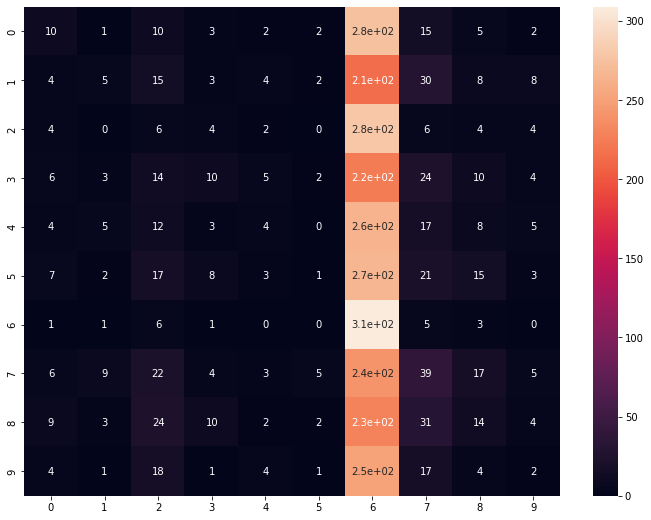

							-----------------------------------------------------------
							 Time for detection (SVM(Non-linear Kernel)) : 15.181 seconds...
							-----------------------------------------------------------

+ ==================================================================================================== +
			4-For Random Forest The Performance result is: 
+ ==================================================================================================== +
Vectorization Technique :  CountVectorizer
--------------------------------------------------
Sampling Technique      :  SMOTE
--------------------------------------------------
Accuracy :  0.1544943820224719
--------------------------------------------------
F1 :  [0.08583691 0.07125891 0.03892944 0.26415094 0.08154506 0.07361963
 0.24627876 0.12573674 0.15860735 0.02758621]
--------------------------------------------------
Reacll :  [0.06153846 0.05119454 0.02580645 0.20860927 0.05900621 0.05247813
 0.83742331 0.09116809 0.

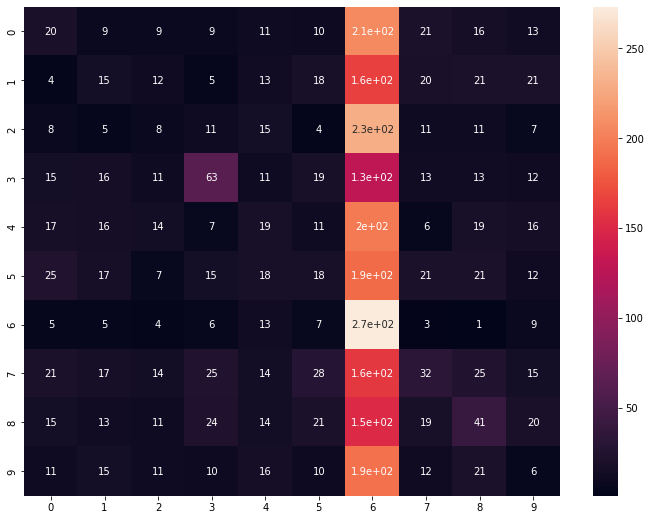

							-----------------------------------------------------------
							 Time for detection (Random Forest) : 22.122 seconds...
							-----------------------------------------------------------

Epoch 1/10
401/401 [==============================] - 2s 4ms/step - loss: 2.3029 - accuracy: 0.1064 - val_loss: 2.2960 - val_accuracy: 0.1127
Epoch 2/10
401/401 [==============================] - 2s 4ms/step - loss: 2.2677 - accuracy: 0.1548 - val_loss: 2.2907 - val_accuracy: 0.1389
Epoch 3/10
401/401 [==============================] - 2s 4ms/step - loss: 2.2119 - accuracy: 0.1836 - val_loss: 2.3234 - val_accuracy: 0.1364
Epoch 4/10
401/401 [==============================] - 2s 4ms/step - loss: 2.1449 - accuracy: 0.2155 - val_loss: 2.4042 - val_accuracy: 0.1433
Epoch 5/10
401/401 [==============================] - 2s 4ms/step - loss: 2.0801 - accuracy: 0.2374 - val_loss: 2.5008 - val_accuracy: 0.1470
Epoch 6/10
401/401 [==============================] - 2s 4ms/step - loss: 2.0173 - accuracy:

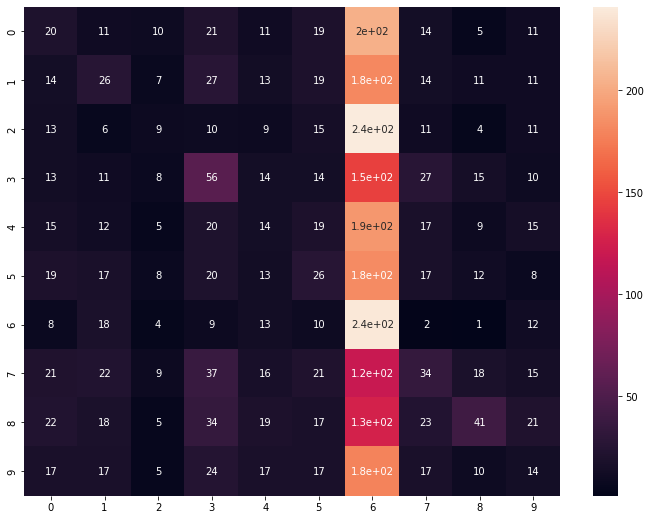

							-----------------------------------------------------------
							 Time for detection (ANN) : 18.64 seconds...
							-----------------------------------------------------------

+ ==================================================================================================== +
			2-For SVM(linear Kernel) The Performance result is: 
+ ==================================================================================================== +
Vectorization Technique :  CountVectorizer
--------------------------------------------------
Sampling Technique      :  RandomOverSampler
--------------------------------------------------
Accuracy :  0.14481897627965043
--------------------------------------------------
F1 :  [0.07775378 0.08695652 0.06361829 0.21350763 0.05882353 0.07637232
 0.21758691 0.1042654  0.15315315 0.06032483]
--------------------------------------------------
Reacll :  [0.05521472 0.05572755 0.04863222 0.15605096 0.03797468 0.0495356
 0.84177215 0.07028754 0.103

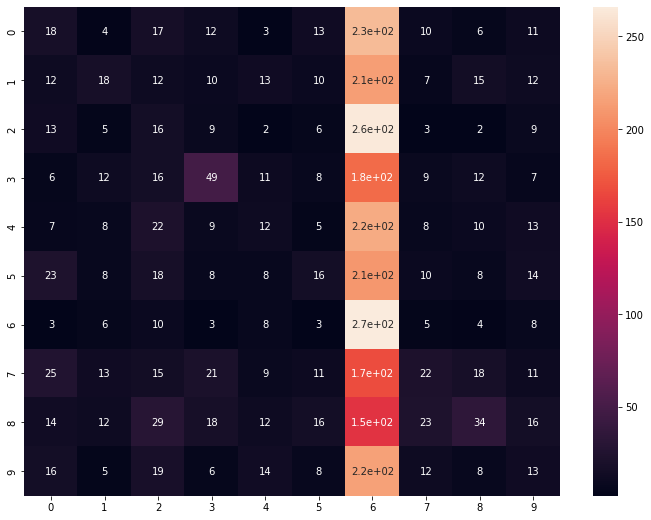

							-----------------------------------------------------------
							 Time for detection (SVM(linear Kernel)) : 14.599 seconds...
							-----------------------------------------------------------

+ ==================================================================================================== +
			3-For SVM(Non-linear Kernel) The Performance result is: 
+ ==================================================================================================== +
Vectorization Technique :  CountVectorizer
--------------------------------------------------
Sampling Technique      :  RandomOverSampler
--------------------------------------------------
Accuracy :  0.12890137328339576
--------------------------------------------------
F1 :  [0.05378973 0.05555556 0.0407332  0.05945946 0.02915452 0.02285714
 0.20444131 0.16269841 0.1475827  0.01139601]
--------------------------------------------------
Reacll :  [0.03374233 0.03095975 0.03039514 0.03503185 0.01582278 0.0123839
 0.91772

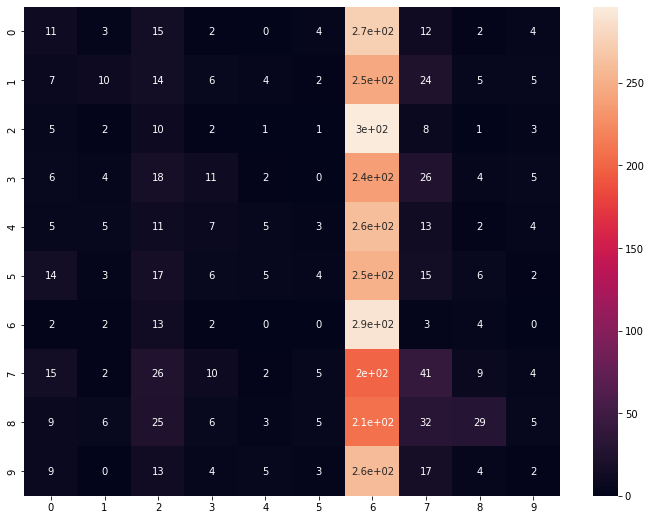

							-----------------------------------------------------------
							 Time for detection (SVM(Non-linear Kernel)) : 15.71 seconds...
							-----------------------------------------------------------

+ ==================================================================================================== +
			4-For Random Forest The Performance result is: 
+ ==================================================================================================== +
Vectorization Technique :  CountVectorizer
--------------------------------------------------
Sampling Technique      :  RandomOverSampler
--------------------------------------------------
Accuracy :  0.14731585518102372
--------------------------------------------------
F1 :  [0.0824295  0.09459459 0.03712297 0.21995927 0.05990783 0.07578947
 0.22342342 0.12673267 0.18846154 0.04683841]
--------------------------------------------------
Reacll :  [0.05828221 0.06501548 0.02431611 0.17197452 0.04113924 0.05572755
 0.78481013 0

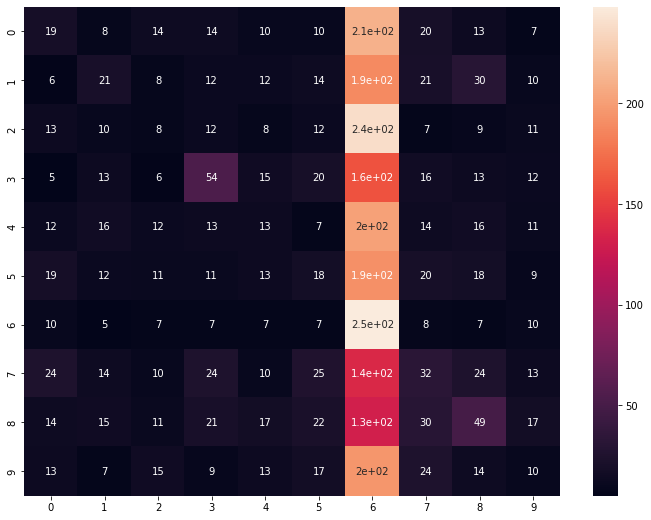

							-----------------------------------------------------------
							 Time for detection (Random Forest) : 21.969 seconds...
							-----------------------------------------------------------

Epoch 1/10
401/401 [==============================] - 3s 6ms/step - loss: 2.3044 - accuracy: 0.1052 - val_loss: 2.3034 - val_accuracy: 0.1052
Epoch 2/10
401/401 [==============================] - 2s 5ms/step - loss: 2.2900 - accuracy: 0.1271 - val_loss: 2.3018 - val_accuracy: 0.1133
Epoch 3/10
401/401 [==============================] - 2s 5ms/step - loss: 2.2696 - accuracy: 0.1377 - val_loss: 2.3125 - val_accuracy: 0.1083
Epoch 4/10
401/401 [==============================] - 2s 4ms/step - loss: 2.2483 - accuracy: 0.1485 - val_loss: 2.3294 - val_accuracy: 0.1114
Epoch 5/10
401/401 [==============================] - 2s 5ms/step - loss: 2.2283 - accuracy: 0.1539 - val_loss: 2.3507 - val_accuracy: 0.1155
Epoch 6/10
401/401 [==============================] - 2s 6ms/step - loss: 2.2067 - accuracy:

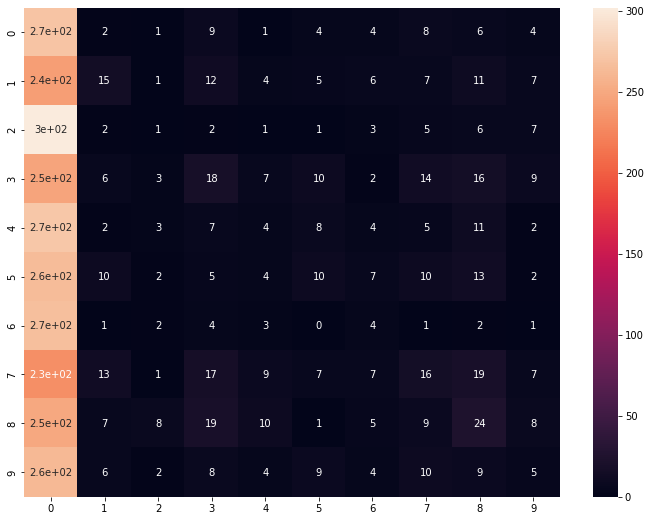

							-----------------------------------------------------------
							 Time for detection (ANN) : 47.138 seconds...
							-----------------------------------------------------------

+ ==================================================================================================== +
			2-For SVM(linear Kernel) The Performance result is: 
+ ==================================================================================================== +
Vectorization Technique :  CountVectorizer
--------------------------------------------------
Sampling Technique      :  RandomUnderSampler
--------------------------------------------------
Accuracy :  0.10455680399500625
--------------------------------------------------
F1 :  [0.02710027 0.04692082 0.01136364 0.05684755 0.03351955 0.04022989
 0.17647059 0.02209945 0.05896806 0.02247191]
--------------------------------------------------
Reacll :  [0.01612903 0.02572347 0.00606061 0.03313253 0.01880878 0.02134146
 0.96842105 0.01219512 0.

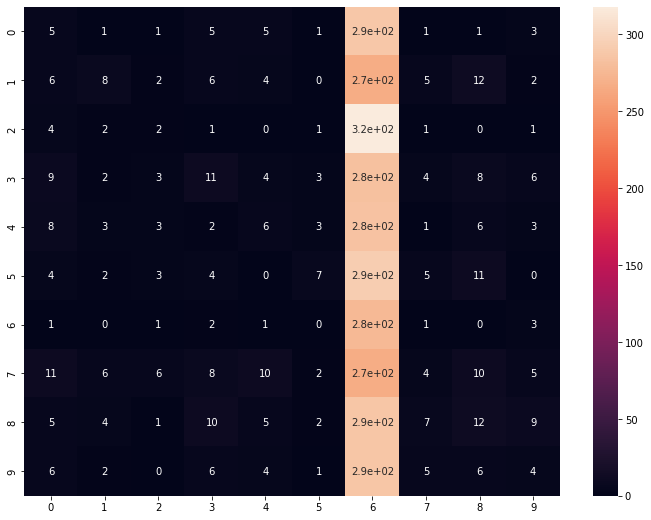

							-----------------------------------------------------------
							 Time for detection (SVM(linear Kernel)) : 8.412 seconds...
							-----------------------------------------------------------

+ ==================================================================================================== +
			3-For SVM(Non-linear Kernel) The Performance result is: 
+ ==================================================================================================== +
Vectorization Technique :  CountVectorizer
--------------------------------------------------
Sampling Technique      :  RandomUnderSampler
--------------------------------------------------
Accuracy :  0.1033083645443196
--------------------------------------------------
F1 :  [0.04166667 0.02352941 0.0058651  0.0807601  0.01215805 0.
 0.17593465 0.05509642 0.04221636 0.00600601]
--------------------------------------------------
Reacll :  [0.02580645 0.01286174 0.0030303  0.05120482 0.00626959 0.
 0.98245614 0.0304878  0

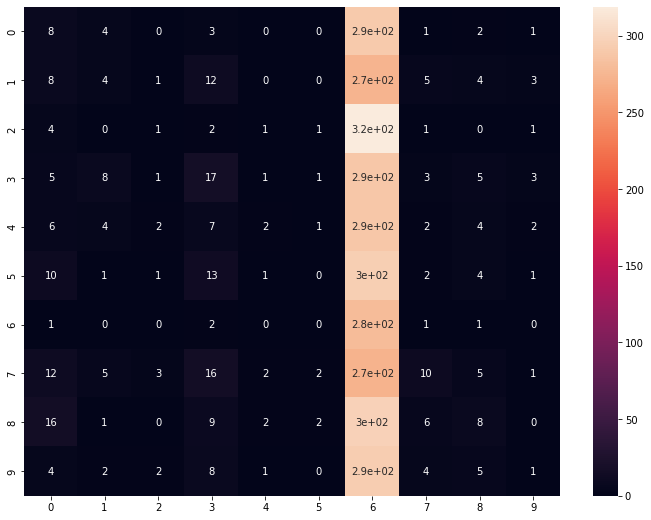

							-----------------------------------------------------------
							 Time for detection (SVM(Non-linear Kernel)) : 10.015 seconds...
							-----------------------------------------------------------

+ ==================================================================================================== +
			4-For Random Forest The Performance result is: 
+ ==================================================================================================== +
Vectorization Technique :  CountVectorizer
--------------------------------------------------
Sampling Technique      :  RandomUnderSampler
--------------------------------------------------
Accuracy :  0.10955056179775281
--------------------------------------------------
F1 :  [0.02453988 0.03977273 0.01126761 0.08737864 0.04278075 0.04787234
 0.18043622 0.03125    0.08735632 0.02717391]
--------------------------------------------------
Reacll :  [0.01290323 0.02250804 0.00606061 0.05421687 0.02507837 0.02743902
 0.95789474

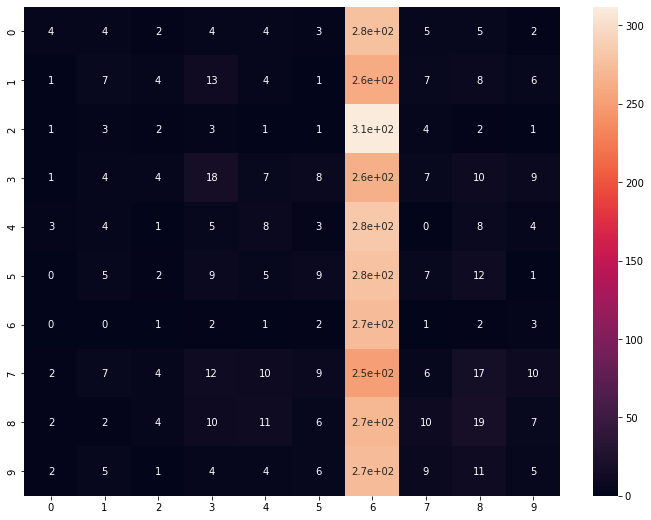

							-----------------------------------------------------------
							 Time for detection (Random Forest) : 16.189 seconds...
							-----------------------------------------------------------

Epoch 1/10
401/401 [==============================] - 3s 6ms/step - loss: 2.3036 - accuracy: 0.1088 - val_loss: 2.3014 - val_accuracy: 0.1092
Epoch 2/10
401/401 [==============================] - 2s 5ms/step - loss: 2.2911 - accuracy: 0.1189 - val_loss: 2.3000 - val_accuracy: 0.1127
Epoch 3/10
401/401 [==============================] - 2s 5ms/step - loss: 2.2737 - accuracy: 0.1288 - val_loss: 2.3119 - val_accuracy: 0.1036
Epoch 4/10
401/401 [==============================] - 2s 5ms/step - loss: 2.2536 - accuracy: 0.1440 - val_loss: 2.3276 - val_accuracy: 0.1152
Epoch 5/10
401/401 [==============================] - 2s 5ms/step - loss: 2.2324 - accuracy: 0.1514 - val_loss: 2.3582 - val_accuracy: 0.1155
Epoch 6/10
401/401 [==============================] - 2s 5ms/step - loss: 2.2118 - accuracy:

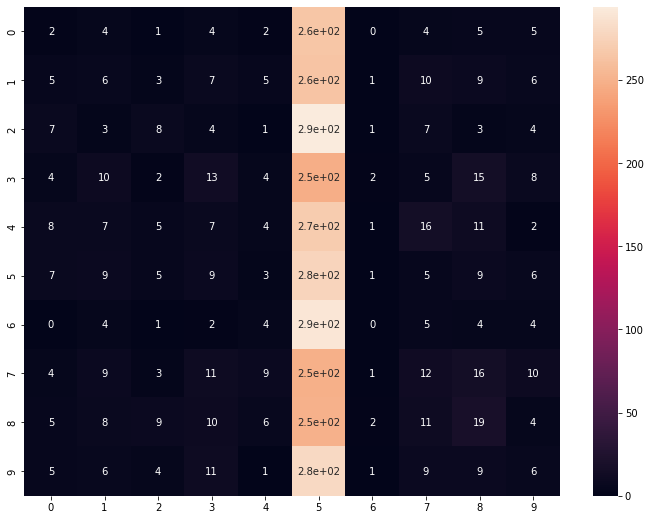

							-----------------------------------------------------------
							 Time for detection (ANN) : 22.583 seconds...
							-----------------------------------------------------------

+ ==================================================================================================== +
			2-For SVM(linear Kernel) The Performance result is: 
+ ==================================================================================================== +
Vectorization Technique :  CountVectorizer
--------------------------------------------------
Sampling Technique      :  SMOTE
--------------------------------------------------
Accuracy :  0.11329588014981273
--------------------------------------------------
F1 :  [0.01648352 0.03438395 0.01694915 0.05665722 0.04736842 0.04289544
 0.19148255 0.04432133 0.05291005 0.03753351]
--------------------------------------------------
Reacll :  [0.01027397 0.01898734 0.00903614 0.03225806 0.02727273 0.02424242
 0.9522293  0.02469136 0.0308642  0.02

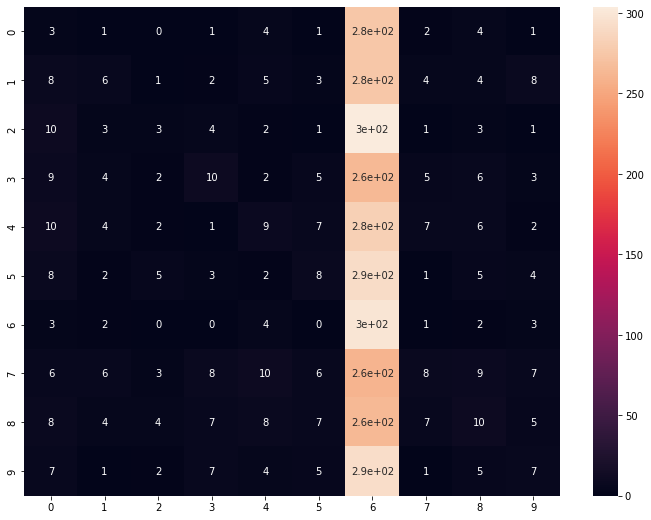

							-----------------------------------------------------------
							 Time for detection (SVM(linear Kernel)) : 8.977 seconds...
							-----------------------------------------------------------

+ ==================================================================================================== +
			3-For SVM(Non-linear Kernel) The Performance result is: 
+ ==================================================================================================== +
Vectorization Technique :  CountVectorizer
--------------------------------------------------
Sampling Technique      :  SMOTE
--------------------------------------------------
Accuracy :  0.10955056179775281
--------------------------------------------------
F1 :  [0.02538071 0.02890173 0.         0.07823961 0.0058309  0.00591716
 0.19302106 0.04931507 0.03409091 0.00578035]
--------------------------------------------------
Reacll :  [0.01712329 0.01582278 0.         0.0516129  0.0030303  0.0030303
 0.97770701 0.0277777

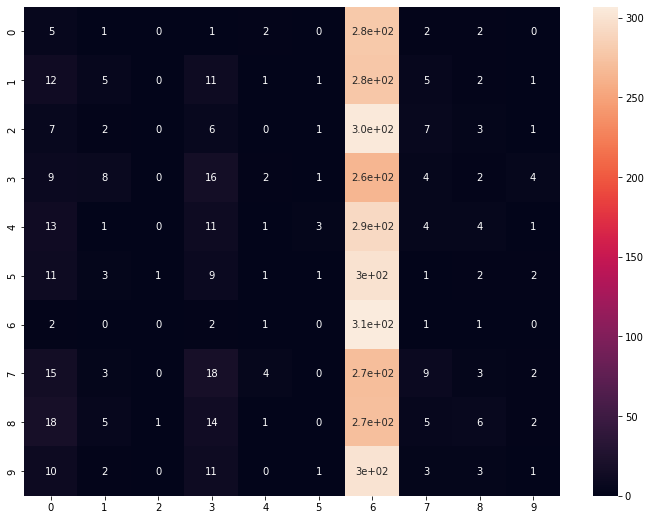

							-----------------------------------------------------------
							 Time for detection (SVM(Non-linear Kernel)) : 10.835 seconds...
							-----------------------------------------------------------

+ ==================================================================================================== +
			4-For Random Forest The Performance result is: 
+ ==================================================================================================== +
Vectorization Technique :  CountVectorizer
--------------------------------------------------
Sampling Technique      :  SMOTE
--------------------------------------------------
Accuracy :  0.11672908863920099
--------------------------------------------------
F1 :  [0.025      0.03867403 0.01709402 0.06575342 0.06266319 0.03191489
 0.19331586 0.06565657 0.09280742 0.01075269]
--------------------------------------------------
Reacll :  [0.01369863 0.0221519  0.00903614 0.03870968 0.03636364 0.01818182
 0.93949045 0.04012346 0

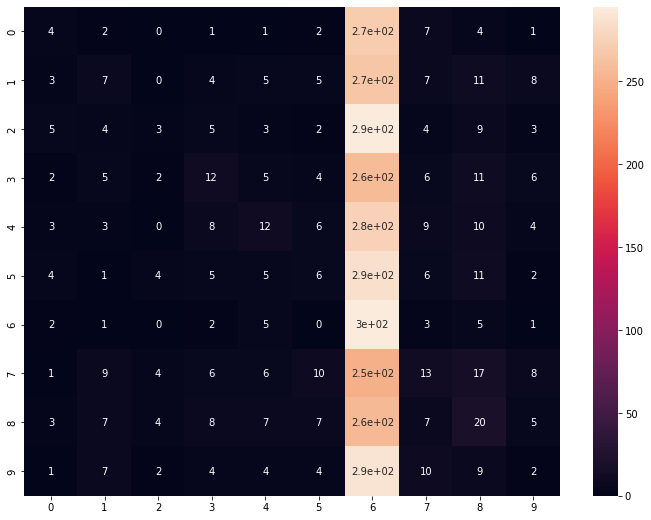

							-----------------------------------------------------------
							 Time for detection (Random Forest) : 16.742 seconds...
							-----------------------------------------------------------

Epoch 1/10
401/401 [==============================] - 2s 4ms/step - loss: 2.3052 - accuracy: 0.1006 - val_loss: 2.2998 - val_accuracy: 0.1177
Epoch 2/10
401/401 [==============================] - 2s 4ms/step - loss: 2.2919 - accuracy: 0.1137 - val_loss: 2.2998 - val_accuracy: 0.1077
Epoch 3/10
401/401 [==============================] - 2s 4ms/step - loss: 2.2717 - accuracy: 0.1355 - val_loss: 2.3035 - val_accuracy: 0.1086
Epoch 4/10
401/401 [==============================] - 2s 4ms/step - loss: 2.2487 - accuracy: 0.1441 - val_loss: 2.3307 - val_accuracy: 0.1283
Epoch 5/10
401/401 [==============================] - 2s 4ms/step - loss: 2.2269 - accuracy: 0.1571 - val_loss: 2.3539 - val_accuracy: 0.1273
Epoch 6/10
401/401 [==============================] - 2s 4ms/step - loss: 2.2089 - accuracy:

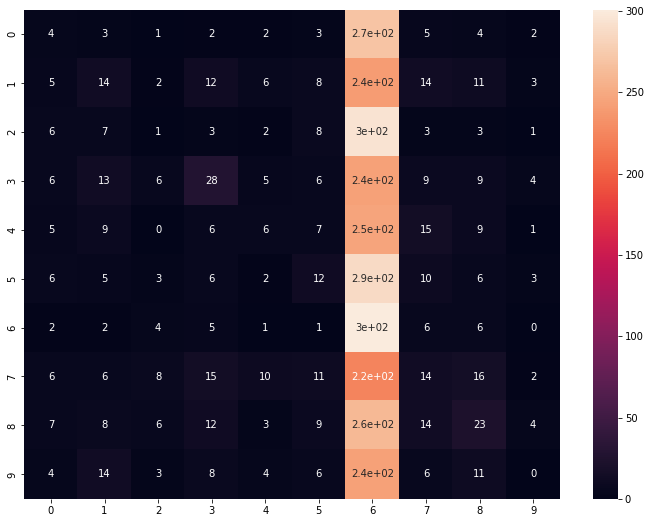

							-----------------------------------------------------------
							 Time for detection (ANN) : 18.772 seconds...
							-----------------------------------------------------------

+ ==================================================================================================== +
			2-For SVM(linear Kernel) The Performance result is: 
+ ==================================================================================================== +
Vectorization Technique :  CountVectorizer
--------------------------------------------------
Sampling Technique      :  RandomOverSampler
--------------------------------------------------
Accuracy :  0.11953807740324594
--------------------------------------------------
F1 :  [0.01075269 0.03988604 0.02881844 0.0795756  0.0518732  0.05347594
 0.19873418 0.03409091 0.05128205 0.0295858 ]
--------------------------------------------------
Reacll :  [0.00675676 0.0221519  0.01519757 0.04545455 0.02960526 0.02932551
 0.95731707 0.01923077 0.0

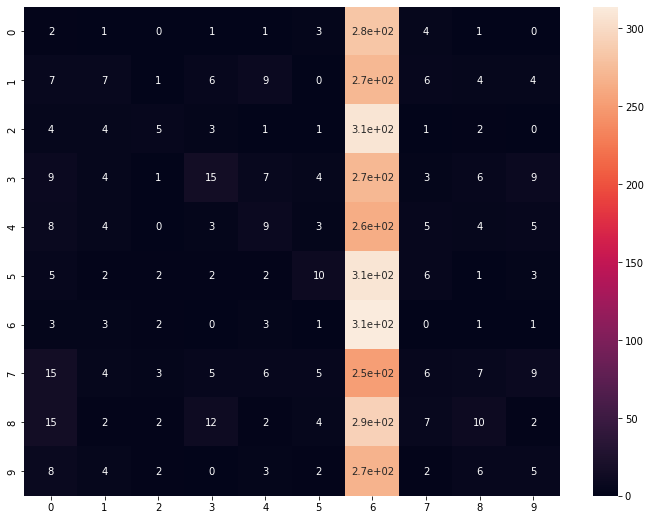

							-----------------------------------------------------------
							 Time for detection (SVM(linear Kernel)) : 12.784 seconds...
							-----------------------------------------------------------

+ ==================================================================================================== +
			3-For SVM(Non-linear Kernel) The Performance result is: 
+ ==================================================================================================== +
Vectorization Technique :  CountVectorizer
--------------------------------------------------
Sampling Technique      :  RandomOverSampler
--------------------------------------------------
Accuracy :  0.10112359550561797
--------------------------------------------------
F1 :  [0.17720745 0.01775148 0.         0.03977273 0.01863354 0.01734104
 0.         0.06436782 0.01639344 0.00632911]
--------------------------------------------------
Reacll :  [0.97972973 0.00949367 0.         0.02121212 0.00986842 0.00879765
 0.    

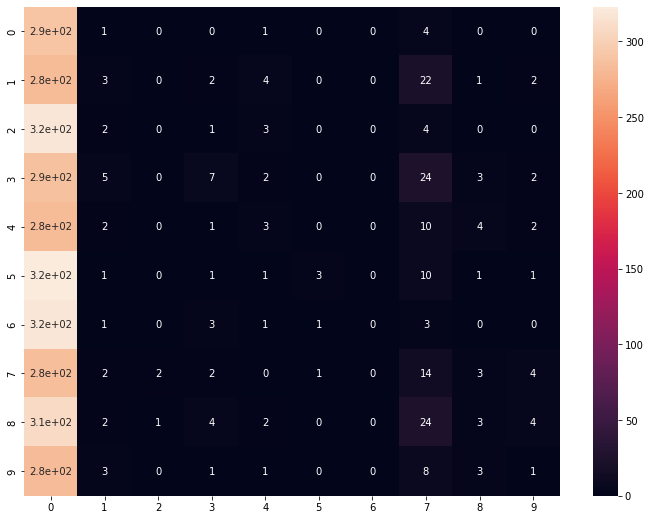

							-----------------------------------------------------------
							 Time for detection (SVM(Non-linear Kernel)) : 9.998 seconds...
							-----------------------------------------------------------

+ ==================================================================================================== +
			4-For Random Forest The Performance result is: 
+ ==================================================================================================== +
Vectorization Technique :  CountVectorizer
--------------------------------------------------
Sampling Technique      :  RandomOverSampler
--------------------------------------------------
Accuracy :  0.1198501872659176
--------------------------------------------------
F1 :  [0.0126183  0.05789474 0.02222222 0.10473815 0.03966006 0.03713528
 0.20052253 0.06138107 0.04640371 0.01785714]
--------------------------------------------------
Reacll :  [0.00675676 0.03481013 0.01215805 0.06363636 0.02302632 0.02052786
 0.93597561 0.

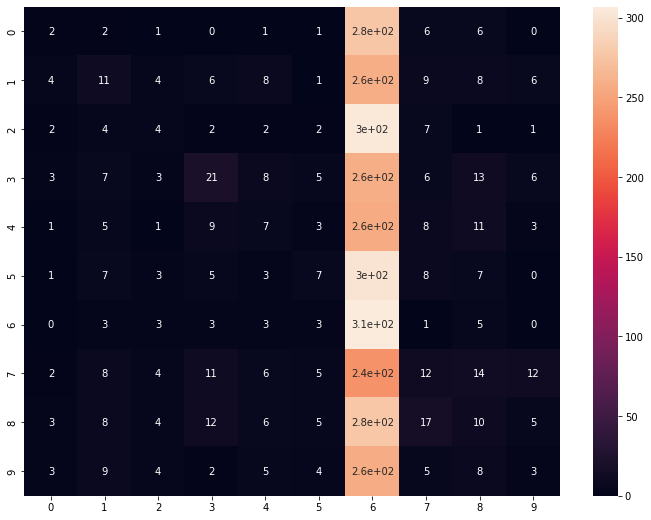

							-----------------------------------------------------------
							 Time for detection (Random Forest) : 15.995 seconds...
							-----------------------------------------------------------



In [ ]:
acc = []
pre = []
rec = []
f1 = []
con = []
vectorization_tec=[]
sampling_tec = []
models_name = []
for vec in vectorizers:
    X = vec.fit_transform(input_feature.combined)
    Y = output_feature
    
    for sampler in samplers:
        X, Y = sampler.fit_resample(X,Y)
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
        
        i = 0
        for name, model in models:
            i = i+1
            start_time = time.time()
            
            if name == "ANN":
                models_name.append(name)
                vectorization_tec.append(type(vec).__name__)
                sampling_tec.append(type(sampler).__name__)

                y_tr = pd.get_dummies(y_train)
                y_ts = pd.get_dummies(y_test)
                
                mapper = dict([[i, j] for i, j in zip(y_tr.columns, list(range(len(y_tr.columns))))])
                
                rnn = Sequential()
                rnn.add(Dense(8, activation="relu", input_dim=3000))
                rnn.add(Dense(16))
                rnn.add(Dropout(0.2))
                rnn.add(Dense(16))
                rnn.add(Dense(y_tr.shape[1], activation="softmax"))
                rnn.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")
                rnn.fit(X_train.toarray(), y_tr, epochs=10, validation_data=(X_test.toarray(), y_ts))
                y_pred = [np.argmax(i) for i in rnn.predict(X_test.toarray())]
                y_ts = y_ts.idxmax(axis=1).map(mapper)
                
                # Accuracy
                accuracy = accuracy_score(y_ts, y_pred)
                acc.append(accuracy)
                # Precision
                precision = precision_score(y_ts, y_pred, average=None)
                pre.append(precision)
              
                # Recall
                recall = recall_score(y_ts, y_pred, average=None)
                rec.append(recall)
                # F1 Score
                f1_sco = f1_score(y_ts, y_pred, average=None)
                f1.append(f1_sco)
                # Confusion Matrix
                confusion_mat = confusion_matrix(y_ts, y_pred)
                con.append(confusion_mat)
                # Report
                report = classification_report(y_ts, y_pred)


                print("+","="*100,"+")
                print('\033[1m' + f"\t\t\t{i}-For {name} The Performance result is: " + '\033[0m')
                print("+","="*100,"+")
                print('Vectorization Technique : ', type(vec).__name__)   
                print("-"*50)
                print('Sampling Technique      : ', type(sampler).__name__)   
                print("-"*50)
                print('Accuracy : ', accuracy)   
                print("-"*50)
                print('F1 : ', f1_sco)
                print("-"*50)
                print('Reacll : ', recall)
                print("-"*50)
                print('Precision : ', precision)
                print("-"*50)
                print('Confusion Matrix....\n', confusion_mat)
                print("-"*50)
                print('Classification Report....\n', report)
                print("-"*50)
                print('Plotting Confusion Matrix...\n')
                plt.figure(figsize=(12, 9))
                sns.heatmap(confusion_mat, annot=True)
                plt.show()



                print("\t\t\t\t\t\t\t-----------------------------------------------------------")
                print(f"\t\t\t\t\t\t\t Time for detection ({name}) : {round((time.time() - start_time), 3)} seconds...")
                print("\t\t\t\t\t\t\t-----------------------------------------------------------")
                print()
                
            else:
                
                # Fitting model to the Training set
                clf = model
                clf.fit(X_train, y_train)

                models_name.append(name)
                vectorization_tec.append(type(vec).__name__)
                sampling_tec.append(type(sampler).__name__)

                # predict values
                y_pred = clf.predict(X_test)

                # Accuracy
                accuracy = accuracy_score(y_test, y_pred)
                acc.append(accuracy)
                # Precision
                precision = precision_score(y_test, y_pred, average=None)
                pre.append(precision)
                # Recall
                recall = recall_score(y_test, y_pred, average=None)
                rec.append(recall)
                # F1 Score
                f1_sco = f1_score(y_test, y_pred, average=None)
                f1.append(f1_sco)
                # Confusion Matrix
                confusion_mat = confusion_matrix(y_test, y_pred)
                con.append(confusion_mat)
                # Report
                report = classification_report(y_test, y_pred)


                print("+","="*100,"+")
                print('\033[1m' + f"\t\t\t{i}-For {name} The Performance result is: " + '\033[0m')
                print("+","="*100,"+")
                print('Vectorization Technique : ', type(vec).__name__)   
                print("-"*50)
                print('Sampling Technique      : ', type(sampler).__name__)   
                print("-"*50)
                print('Accuracy : ', accuracy)   
                print("-"*50)
                print('F1 : ', f1_sco)
                print("-"*50)
                print('Reacll : ', recall)
                print("-"*50)
                print('Precision : ', precision)
                print("-"*50)
                print('Confusion Matrix....\n', confusion_mat)
                print("-"*50)
                print('Classification Report....\n', report)
                print("-"*50)
                print('Plotting Confusion Matrix...\n')
                plt.figure(figsize=(12, 9))
                sns.heatmap(confusion_mat, annot=True)
                plt.show()



                print("\t\t\t\t\t\t\t-----------------------------------------------------------")
                print(f"\t\t\t\t\t\t\t Time for detection ({name}) : {round((time.time() - start_time), 3)} seconds...")
                print("\t\t\t\t\t\t\t-----------------------------------------------------------")
                print()

In [ ]:
results_wihtout_pos = pd.DataFrame({"Models":models_name,"Vectorization":vectorization_tec,"Sampling Technique":sampling_tec,"Accuracy":acc,"Precision":pre,"Recall":rec,"F1-Score":f1,"Confusion Matrix":con})
results_wihtout_pos.to_csv("/content/drive/MyDrive/Text",index=False)


In [ ]:
!pip install python-docx
from docx import Document

def df_to_word(data: dict, report_name:str):
  assert type(data) == dict, 'data has to be dict'
  assert '.docx' in report_name, 'report_name has to be a .docx file'
  df = pd.DataFrame(data)
  doc = Document()
  table = doc.add_table(df.shape[0]+1, df.shape[1])
  for j in range(df.shape[-1]):
    table.cell(0,j).text = df.columns[j]
    for i in range(df.shape[0]):
      for j in range(df.shape[-1]):
        table.cell(i+1,j).text = str(df.values[i,j])
        doc.save(f'./{report_name}')

df_to_word(results_wihtout_pos.to_dict(), "performance_without_POS.docx")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Results table**

In [ ]:
results_wihtout_pos

,Models,Vectorization,Sampling Technique,Accuracy,Precision,Recall,F1-Score,Confusion Matrix
0,ANN,TfidfVectorizer,RandomUnderSampler,0.327091,"[0.3565459610027855, 0.19239904988123516, 0.32...","[0.4012539184952978, 0.26732673267326734, 0.32...","[0.3775811209439528, 0.22375690607734808, 0.32...","[[128, 11, 39, 12, 27, 39, 9, 6, 22, 26], [15,..."
1,SVM(linear Kernel),TfidfVectorizer,RandomUnderSampler,0.370787,"[0.42249240121580545, 0.21666666666666667, 0.3...","[0.43573667711598746, 0.25742574257425743, 0.3...","[0.4290123456790123, 0.23529411764705882, 0.36...","[[139, 11, 33, 0, 23, 30, 9, 21, 26, 27], [11,..."
2,SVM(Non-linear Kernel),TfidfVectorizer,RandomUnderSampler,0.386080,"[0.45454545454545453, 0.23943661971830985, 0.4...","[0.438871473354232, 0.28052805280528054, 0.367...","[0.44657097288676234, 0.25835866261398177, 0.3...","[[140, 10, 29, 0, 25, 27, 9, 22, 28, 29], [6, ..."
3,Random Forest,TfidfVectorizer,RandomUnderSampler,0.379838,"[0.39402173913043476, 0.23684210526315788, 0.4...","[0.45454545454545453, 0.297029702970297, 0.253...","[0.42212518195050946, 0.2635431918008785, 0.31...","[[145, 15, 17, 4, 26, 24, 16, 29, 28, 15], [17..."
4,ANN,TfidfVectorizer,SMOTE,0.328027,"[0.35410764872521244, 0.27472527472527475, 0.3...","[0.382262996941896, 0.20891364902506965, 0.285...","[0.36764705882352944, 0.23734177215189875, 0.2...","[[125, 8, 27, 2, 24, 62, 7, 12, 50, 10], [17, ..."
5,SVM(linear Kernel),TfidfVectorizer,SMOTE,0.387953,"[0.4083333333333333, 0.31761006289308175, 0.36...","[0.44954128440366975, 0.28133704735376047, 0.3...","[0.4279475982532751, 0.2983751846381093, 0.375...","[[147, 11, 24, 7, 30, 42, 4, 22, 21, 19], [20,..."
6,SVM(Non-linear Kernel),TfidfVectorizer,SMOTE,0.398564,"[0.4342857142857143, 0.3344370860927152, 0.388...","[0.4648318042813456, 0.28133704735376047, 0.41...","[0.44903988183161, 0.3055975794251135, 0.40185...","[[152, 10, 28, 6, 27, 34, 5, 25, 20, 20], [19,..."
7,Random Forest,TfidfVectorizer,SMOTE,0.386080,"[0.40053763440860213, 0.29073482428115016, 0.4...","[0.45565749235474007, 0.25348189415041783, 0.3...","[0.4263233190271816, 0.2708333333333333, 0.377...","[[149, 11, 21, 12, 25, 33, 9, 30, 24, 13], [17..."
8,ANN,TfidfVectorizer,RandomOverSampler,0.333333,"[0.41642228739002934, 0.21008403361344538, 0.2...","[0.44654088050314467, 0.22590361445783133, 0.2...","[0.4309559939301973, 0.21770682148040638, 0.28...","[[142, 6, 28, 5, 27, 28, 6, 24, 19, 33], [14, ..."
9,SVM(linear Kernel),TfidfVectorizer,RandomOverSampler,0.374844,"[0.4269340974212034, 0.2548476454293629, 0.319...","[0.46855345911949686, 0.27710843373493976, 0.3...","[0.4467766116941529, 0.26551226551226553, 0.32...","[[149, 10, 33, 4, 28, 35, 7, 21, 16, 15], [16,..."
